# Kaggle House Prices Competition

In [2488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
train_raw = pd.read_csv('houseprices_train.csv')
test_raw = pd.read_csv('houseprices_test.csv')

In [2489]:
train = train_raw.copy()
test = test_raw.copy()
full_data = [train,test]

In [2490]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2491]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2492]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [2493]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Target feature

C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


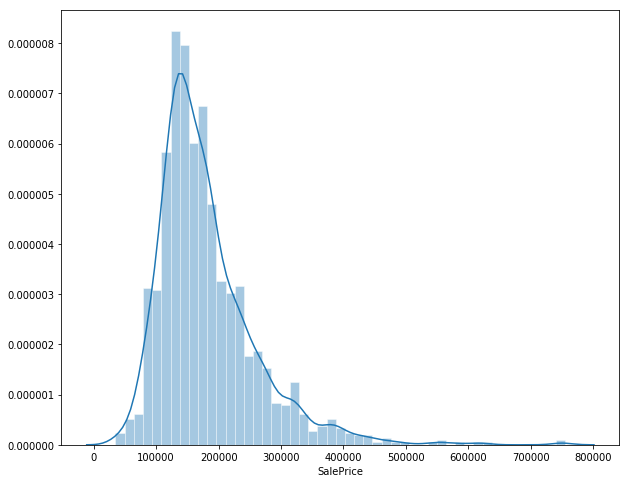

In [2494]:
plt.figure(figsize=(10,8))
_ = sns.distplot(train.SalePrice, hist_kws={'edgecolor':'white'})

In [2495]:
print('SalePrice variable skewness: ', train.SalePrice.skew())
print('SalePrice variable kurtosis: ', train.SalePrice.kurtosis())

SalePrice variable skewness:  1.8828757597682129
SalePrice variable kurtosis:  6.536281860064529


It seems that the target feature is highly positively skewed, which might not be the best scenario. We can apply log transforamtions to transform it to a normal distribution (or as close as possible).                               
https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data                      
https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

One thing to remember, if we apply log-transformation to some features, we will need to "invert" the log-transformation of our predicted values before submiting it in the competition.

C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


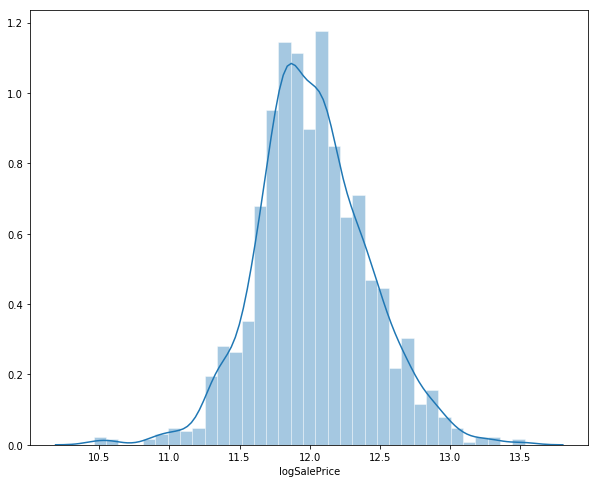

In [2496]:
train['logSalePrice'] = np.log(train['SalePrice'])
plt.figure(figsize=(10,8))
grid = sns.distplot(train.logSalePrice, hist_kws={'edgecolor':'white'})

In [2497]:
print('log-SalePrice variable skewness: ', train.logSalePrice.skew())
print('log-SalePrice variable kurtosis: ', train.logSalePrice.kurtosis())

log-SalePrice variable skewness:  0.12133506220520406
log-SalePrice variable kurtosis:  0.8095319958036296


# Correlation Matrix

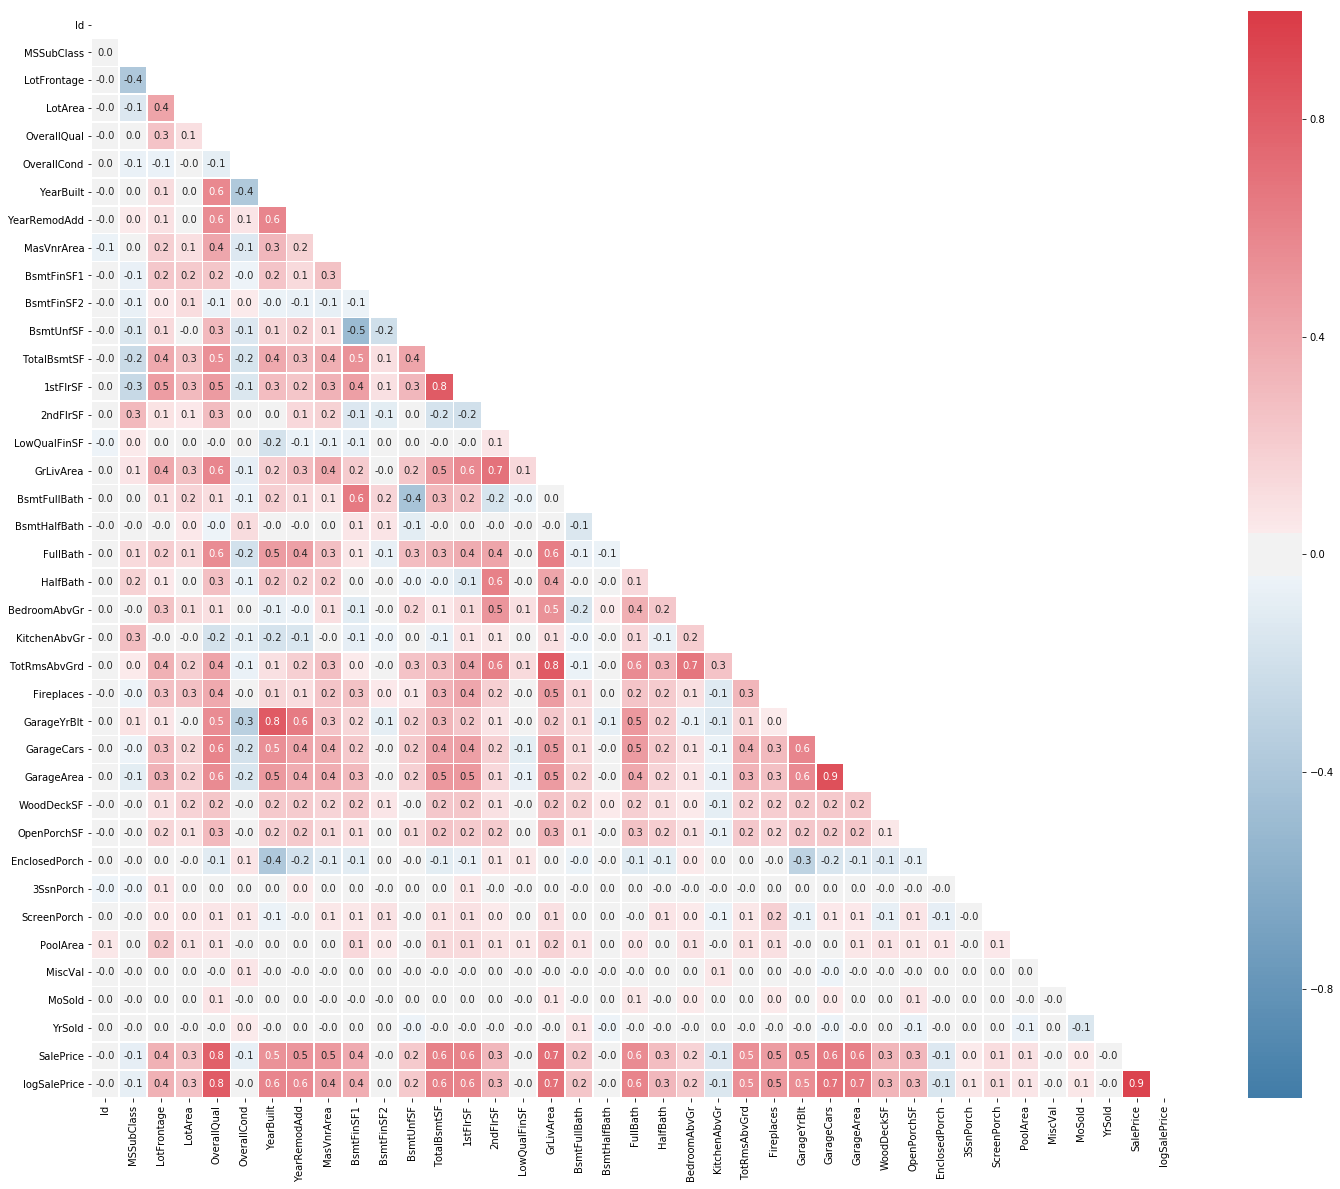

In [2498]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
grid = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.1f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

In [2499]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
logSalePrice     0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

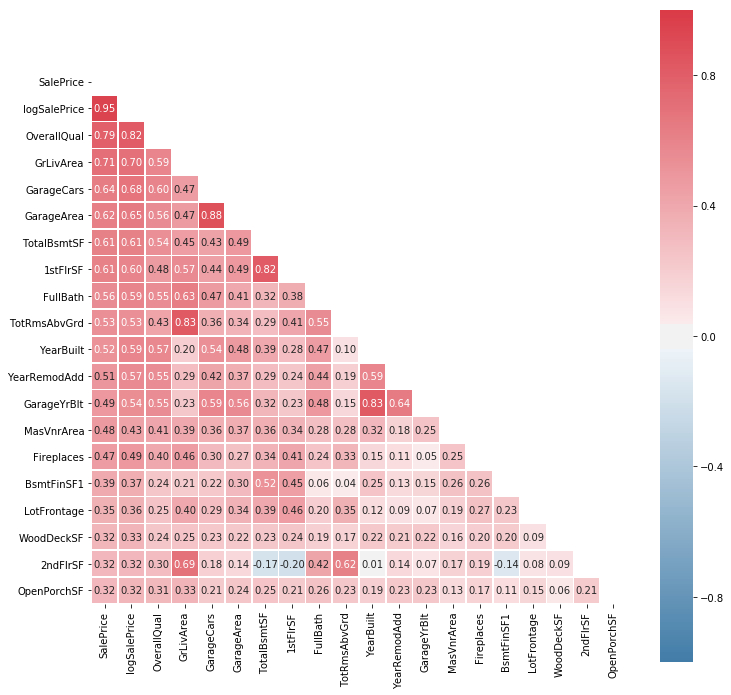

In [2500]:
k = 20 #number of variables for heatmap, using k = len(corr) gives a very poluted map
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corr_map = corr.loc[cols, cols]

mask = np.zeros_like(corr_map)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
grid = sns.heatmap(corr_map, mask=mask, square=True, annot=True, fmt='.2f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

It seems that some features are more linearly correlated to the log-transformed 'SalePrice' than the "original" one.

## Feature control dataframe

In [2501]:
# Create a pandas DataFrame to control what is going on with the features
#Coding:
# 0 - not inspected
# 1 - inspected and need discussion
# 2 - inspected and ready
# 3 - inspected and must drop before training
# 4 - created and ready
# Ps: this does not include preprocess phase such as OneHotEncoding

train_FeatCtrl = pd.DataFrame(np.zeros((1,len(train.columns))), dtype=int, columns = train.columns)
print(train_FeatCtrl.shape)
test_FeatCtrl = pd.DataFrame(np.zeros((1,len(test.columns))), dtype=int, columns = test.columns)
print(test_FeatCtrl.shape)

(1, 82)
(1, 80)


In [2502]:
FeatCtrl = ['0 - not inspected', 
            '1 - inspected and need discussion',
            '2 - inspected and ready',
            '3 - inspected and must drop before training',
            '4 - created and ready', 
            '5 - inspected and consider log-transformation']

# Missing values

Split the data into numerical and categorical

In [2503]:
# selecting the numerical and categorical columns
train_num_cols = train.select_dtypes(exclude=['object']).columns
train_cat_cols = train.select_dtypes(include=['object']).columns
# checking length
print(len(train_num_cols)+len(train_cat_cols) == len(train.columns))

test_num_cols = test.select_dtypes(exclude=['object']).columns
test_cat_cols = test.select_dtypes(include=['object']).columns
# checking length
print(len(test_num_cols)+len(test_cat_cols) == len(test.columns))

True
True


Checking how much data is missing:

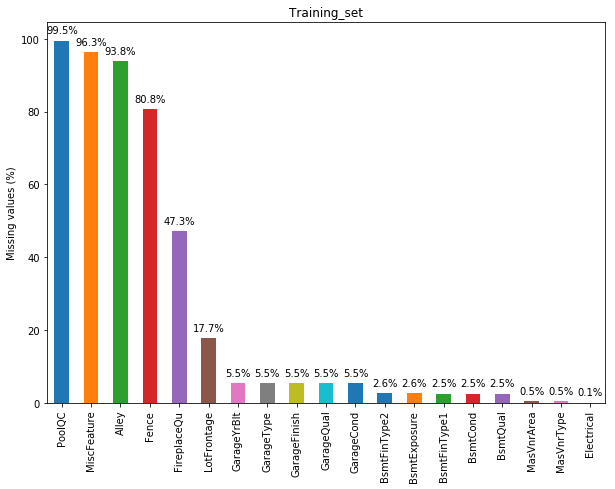

In [2504]:
# missing train_data
missing_train = (train.isnull().sum()) / len(train) * 100
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

fig, ax = plt.subplots()
grid = missing_train.plot(kind='bar', figsize=(10,7))
grid.set_title('Training_set')
grid.set_ylabel('Missing values (%)')

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


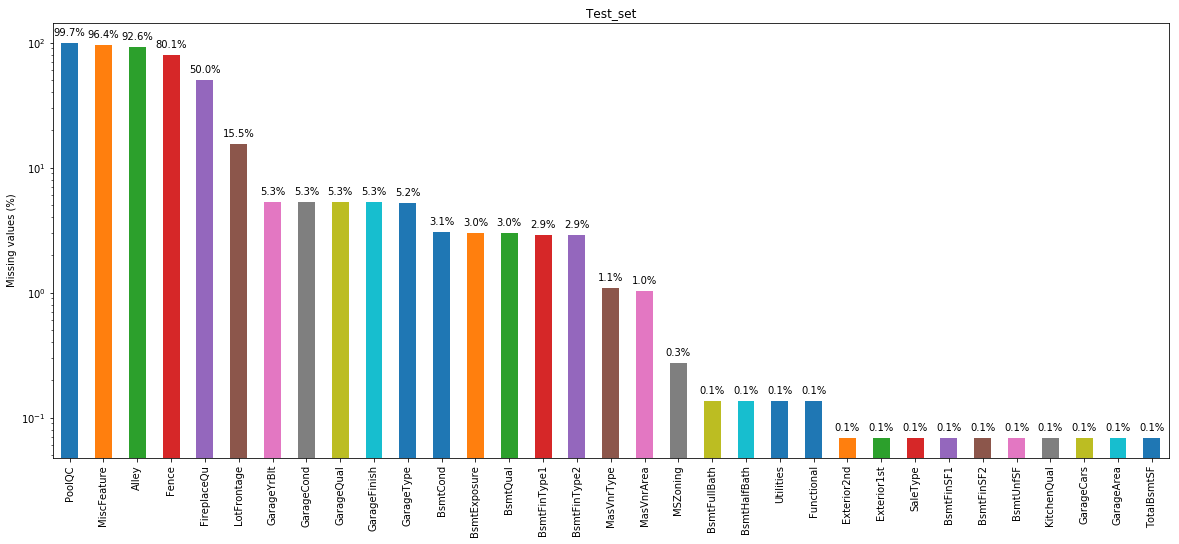

In [2505]:
# missing test_data
missing_test = (test.isnull().sum()) / len(train) * 100
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)


fig, ax = plt.subplots()
grid = missing_test.plot(kind='bar', log=True, figsize=(20,8))
grid.set_title('Test_set')
grid.set_ylabel('Missing values (%)')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


### PoolQC: missing 99.5% in train & 99.7% in test

**PoolArea:** Pool area in square feet

**PoolQC:** Pool quality                     
Ex -	 Excellent               
Gd -	 Good                
TA -	 Average/Typical              
Fa -	 Fair              
NA -	 No Pool             

In [2506]:
train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [2507]:
train['PoolQC'].isnull().sum()

1453

In [2508]:
for dataset in full_data:
    dataset['PoolQC'] = dataset['PoolQC'].fillna('None')
    
for dataset in full_data:
    dataset['PoolArea'] = dataset['PoolArea'].fillna(0)

In [2509]:
train['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [2510]:
corr['PoolArea'].sort_values(ascending=False).head(10)

PoolArea        1.000000
LotFrontage     0.206167
GrLivArea       0.170205
BsmtFinSF1      0.140491
1stFlrSF        0.131525
TotalBsmtSF     0.126053
Fireplaces      0.095074
SalePrice       0.092404
TotRmsAbvGrd    0.083757
2ndFlrSF        0.081487
Name: PoolArea, dtype: float64

There is some correlation with LotFrontage, we should check that.

In [2511]:
len(train[train['PoolArea']>0.])

7

In [2512]:
corr['SalePrice']['PoolArea']

0.09240354949187278

In [2513]:
train['LotFrontage'].isnull().sum()

259

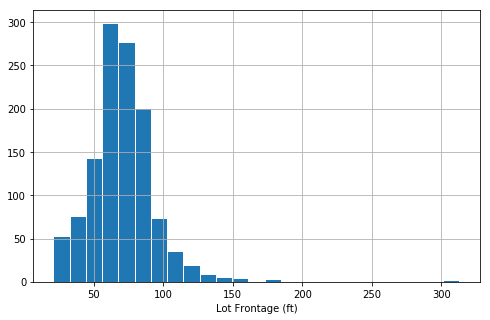

In [2514]:
grid = train['LotFrontage'].hist(edgecolor='w', figsize=(8,5), bins=25)
plt.xlabel('Lot Frontage (ft)')
plt.show()

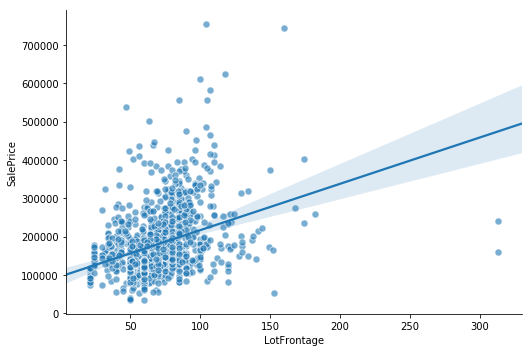

In [2515]:
grid = sns.lmplot(x="LotFrontage", y="SalePrice", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
               size=5, aspect=1.5)
plt.show()

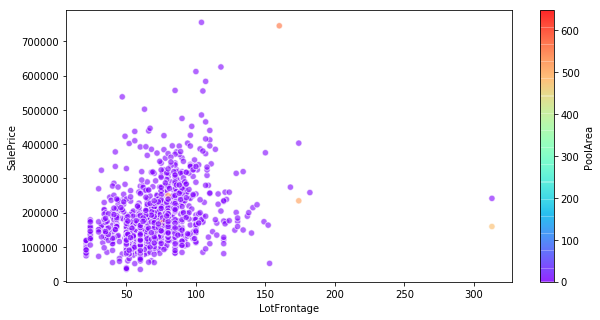

In [2516]:
grid = train.plot(kind="scatter", y='SalePrice', x='LotFrontage',s=40, edgecolor='w', alpha=0.6, figsize=(10,5), 
                              c="PoolArea", cmap=plt.get_cmap("rainbow"), colorbar=True, sharex=False)
plt.show()

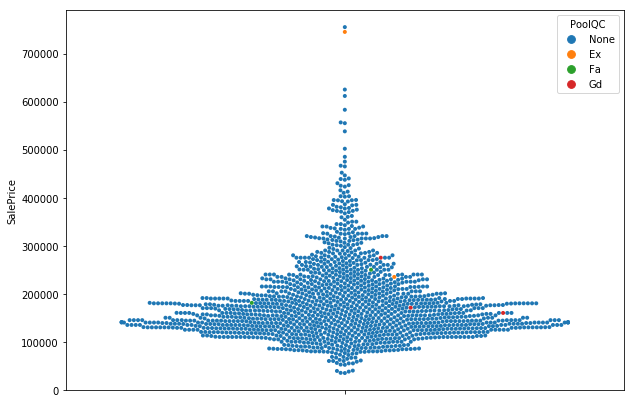

In [2517]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(y='SalePrice', x=[""]*len(train), hue='PoolQC', data=train, size=4)
plt.show()

Let us keep LotFrontage for a latter check

PoolQC and PoolArea are highly correlated. The number of missing values in PoolQC probably is from houses with no pool, hence null PoolArea. If the correlation SalePrice vs. PoolArea was high we could think in creating a new feature 'HasPool'. Furthermore, I would say both features are not statisticaly relevant. Since PoolArea has low correlation with SalePrice, in my opinion both PoolQC and PoolArea could be discarded.

In [2518]:
train_FeatCtrl['PoolQC'] = 3
train_FeatCtrl['PoolAreA'] = 3
test_FeatCtrl['PoolQC'] = 3
test_FeatCtrl['PoolArea'] = 3

### MiscFeature: missing 96.3% in train & 96.6% in test

**MiscFeature:** Miscellaneous feature not covered in other categories                     
Elev - Elevator                     
Gar2 - 2nd Garage (if not described in garage section)                  
Othr - Other                           
Shed - Shed (over 100 SF)                 
TenC - Tennis Court                     
Na - None                 
		
**MiscVal:** $Value of miscellaneous feature

In [2519]:
train['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [2520]:
train['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [2521]:
# houses with no MiscFeature have MiscVal = 0
print('{0:.2f} %'.format(len(train[train['MiscVal']>0.]) * 100 / len(train['MiscVal'])))

3.56 %


In [2522]:
corr['MiscVal'].sort_values(ascending=False).head(10)

MiscVal          1.000000
OverallCond      0.068777
KitchenAbvGr     0.062341
LotArea          0.038068
ScreenPorch      0.031946
PoolArea         0.029669
TotRmsAbvGrd     0.024763
EnclosedPorch    0.018361
2ndFlrSF         0.016197
BedroomAbvGr     0.007767
Name: MiscVal, dtype: float64

In [2523]:
corr['SalePrice']['MiscVal']

-0.02118957964030379

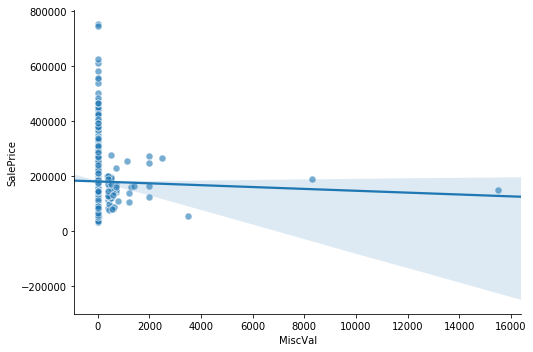

In [2524]:
grid = sns.lmplot(x="MiscVal", y="SalePrice", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
               size=5, aspect=1.5)
plt.show()

It seems again that both MiscFeature and MiscVal don't have much information for us.

In [2525]:
for dataset in full_data:
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
    dataset['MiscVal'] = dataset['MiscVal'].fillna(0)    

In [2526]:
train_FeatCtrl['MiscFeature'] = 3
test_FeatCtrl['MiscFeature'] = 3
train_FeatCtrl['MiscVal'] = 3
test_FeatCtrl['MiscVal'] = 3

### Alley: missing 93.8% in train & 92.7% in test

**Alley:** Type of alley access to property                  
Grvl - Gravel                 
Pave - Paved                    
NA - No alley access                    

In [2527]:
print(train['Alley'].value_counts(dropna=False))
print()
print(test['Alley'].value_counts(dropna=False))

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


This is a categorical feature so let us create another feature 'AlleyBin', where 0 = no alley access and 1 = it has alley access, and check the correlation.

In [2528]:
for dataset in full_data:
    dataset['Alley'] = dataset['Alley'].fillna('None')
    dataset['AlleyBin'] = (dataset.Alley != 'None').map({True:1, False:0})
    print(dataset['AlleyBin'].value_counts())
    print()

0    1369
1      91
Name: AlleyBin, dtype: int64

0    1352
1     107
Name: AlleyBin, dtype: int64



In [2529]:
corr = train.corr()
print(corr['AlleyBin'].sort_values(ascending=False).head(10))
print(corr['AlleyBin'].sort_values(ascending=False).tail(10))

AlleyBin         1.000000
EnclosedPorch    0.179001
MSSubClass       0.149569
2ndFlrSF         0.104658
OverallCond      0.072953
OpenPorchSF      0.063947
LowQualFinSF     0.045940
BsmtUnfSF        0.035843
KitchenAbvGr     0.035523
BedroomAbvGr     0.014432
Name: AlleyBin, dtype: float64
WoodDeckSF     -0.114649
Fireplaces     -0.117753
SalePrice      -0.123611
logSalePrice   -0.132336
TotalBsmtSF    -0.134872
1stFlrSF       -0.141068
BsmtFinSF1     -0.146564
GarageYrBlt    -0.166670
LotFrontage    -0.173249
YearBuilt      -0.253115
Name: AlleyBin, dtype: float64


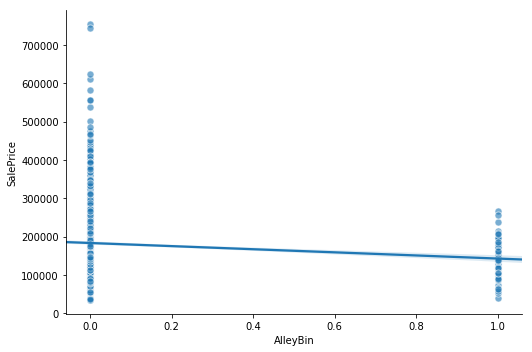

In [2530]:
grid = sns.lmplot(x="AlleyBin", y="SalePrice", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
                  size=5, aspect=1.5)
plt.show()

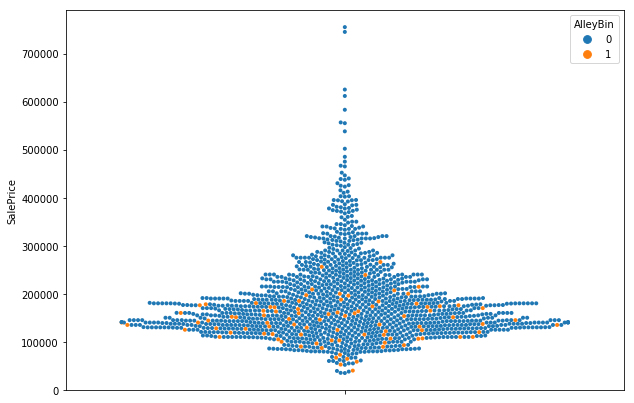

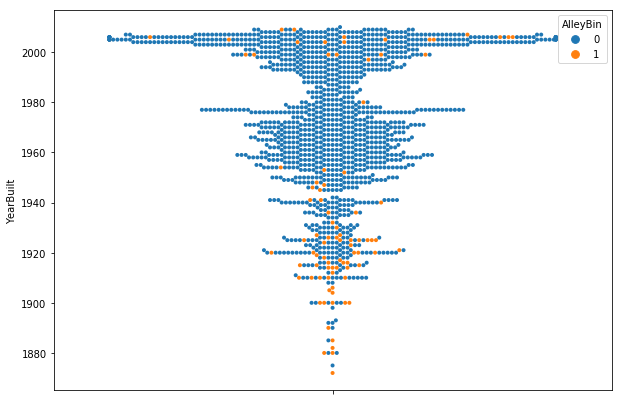

In [2531]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(y="SalePrice", x=[""]*len(train), hue='AlleyBin', data=train, size=4)
plt.show()

plt.figure(figsize=(10,7))
grid = sns.swarmplot(y="YearBuilt", x=[""]*len(train), hue='AlleyBin', data=train, size=4)
plt.show()

Correlation is small in this new binary feature. We have 91 positive representatives and 1369 negative representatives we could create a bias using this feature if the correlation was higher.

In [2532]:
train_FeatCtrl['Alley'] = 3
test_FeatCtrl['Alley'] = 3
train_FeatCtrl['AlleyBin'] = 1
test_FeatCtrl['AlleyBin'] = 1

### Fence: missing 80.8% in train & 80.1% in test

**Fence:** Fence quality                 
GdPrv - Good Privacy                  
MnPrv -	Minimum Privacy                
GdWo - Good Wood                 
MnWw - Minimum Wood/Wire               
NA - No Fence                

In [2533]:
train['Fence'].value_counts().sum()

281

In [2534]:
for dataset in full_data:
    dataset['Fence'] = dataset['Fence'].fillna('None')
    dataset['FenceBin'] = (dataset.Fence != 'None').map({True:1, False:0})
    print(dataset['FenceBin'].value_counts())
    print()

0    1179
1     281
Name: FenceBin, dtype: int64

0    1169
1     290
Name: FenceBin, dtype: int64



In [2535]:
corr = train.corr()
corr['SalePrice']['FenceBin']

-0.1721839440381199

In [2536]:
print(corr['FenceBin'].sort_values(ascending=False).head(5))
print(corr['FenceBin'].sort_values(ascending=False).tail(5))

FenceBin         1.000000
OverallCond      0.170748
BsmtFinSF2       0.122199
PoolArea         0.119941
EnclosedPorch    0.070005
Name: FenceBin, dtype: float64
logSalePrice   -0.177217
OverallQual    -0.189639
FullBath       -0.213837
YearBuilt      -0.227769
GarageYrBlt    -0.241250
Name: FenceBin, dtype: float64


So, I vote to drop "Fence" and keep "FenceBin".

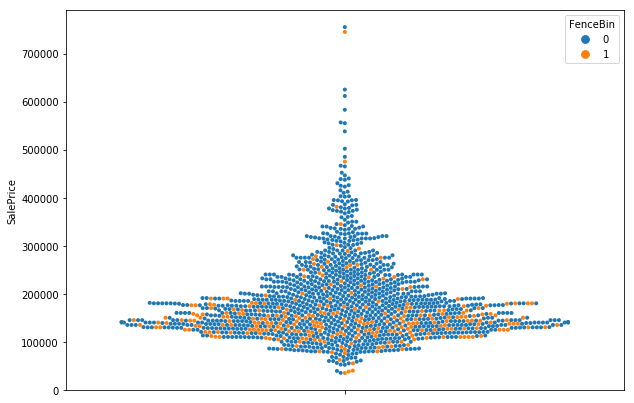

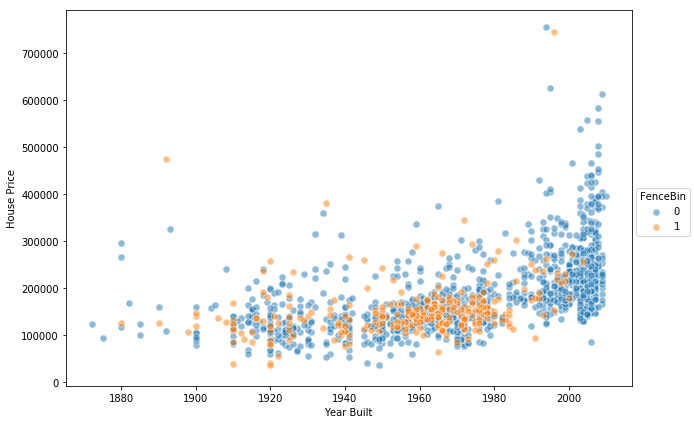

In [2537]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(y="SalePrice", x=[""]*len(train), hue='FenceBin', data=train, size=4)
plt.show()

grid = sns.FacetGrid(train, size=6, aspect=1.5, hue='FenceBin', despine=False)
grid.map(plt.scatter,'YearBuilt', 'SalePrice', edgecolor='w', s=50, alpha=0.5)
grid.add_legend()
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()

In [2538]:
train_FeatCtrl['Fence'] = 3
test_FeatCtrl['Fence'] = 3
train_FeatCtrl['FenceBin'] = 4
test_FeatCtrl['FenceBin'] = 4

# FireplaceQu: missing 47.3% in train & 50.0% in test

**Fireplaces:** Number of fireplaces            

**FireplaceQu:** Fireplace quality                      
Ex -	Excellent - Exceptional Masonry Fireplace              
Gd -	Good - Masonry Fireplace in main level                                                    
TA -	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement             
Fa -	Fair - Prefabricated Fireplace in basement                
Po -	Poor - Ben Franklin Stove                      
NA -	No Fireplace

In [2539]:
print(train.Fireplaces.value_counts(dropna=False))
print()
print(test.Fireplaces.value_counts(dropna=False))

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64


In [2540]:
print(train.FireplaceQu.value_counts(dropna=False))
print()
print(test.FireplaceQu.value_counts(dropna=False))

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64


In [2541]:
corr['SalePrice']['Fireplaces']

0.4669288367515242

In [2542]:
for dataset in full_data:
    dataset['FireplacesBin'] = dataset['Fireplaces'].copy()
    dataset['FireplacesBin'].where(dataset['FireplacesBin'] < 2, 2, inplace=True)

The number of fireplaces is important, so we should set missing values in FireplaceQu as "NA".

In [2543]:
ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

for dataset in full_data:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')
    dataset['FireplaceQu_ord'] = dataset['FireplaceQu'].replace(ordinalQUAL_mapper)
    print(dataset['FireplaceQu_ord'].value_counts())
    print()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu_ord, dtype: int64

0    730
4    364
3    279
2     41
1     26
5     19
Name: FireplaceQu_ord, dtype: int64



In [2544]:
corr = train.corr()
print(corr['FireplaceQu_ord'].sort_values(ascending=False).head(10))
print(corr['FireplaceQu_ord'].sort_values(ascending=False).tail(10))

FireplaceQu_ord    1.000000
FireplacesBin      0.871715
Fireplaces         0.863241
logSalePrice       0.546362
SalePrice          0.520438
OverallQual        0.490788
GrLivArea          0.469947
1stFlrSF           0.407887
GarageCars         0.370034
TotRmsAbvGrd       0.355589
Name: FireplaceQu_ord, dtype: float64
BsmtFinSF2       0.001518
MiscVal         -0.020872
LowQualFinSF    -0.023739
MSSubClass      -0.039201
EnclosedPorch   -0.042697
YrSold          -0.051293
OverallCond     -0.056899
FenceBin        -0.096857
AlleyBin        -0.108157
KitchenAbvGr    -0.154811
Name: FireplaceQu_ord, dtype: float64


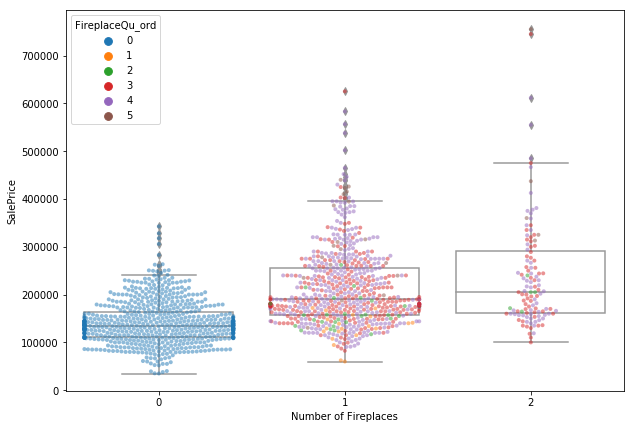

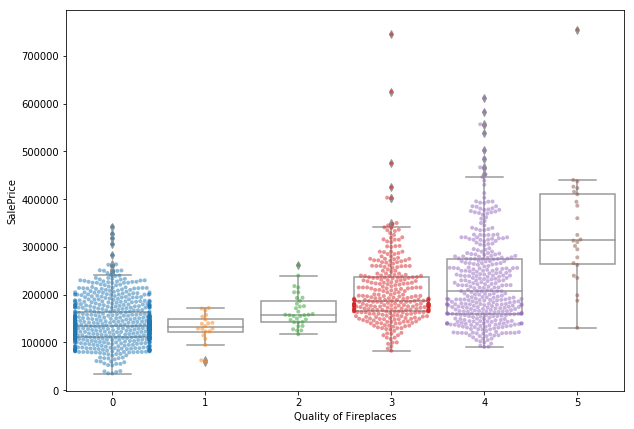

"quality_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}"

In [2545]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(y="SalePrice", x='FireplacesBin', hue='FireplaceQu_ord', data=train, size=4, alpha=.5)
grid = sns.boxplot(y="SalePrice", x='FireplacesBin', data=train, color='1')
plt.xlabel('Number of Fireplaces')
plt.show()

plt.figure(figsize=(10,7))
grid = sns.swarmplot(y="SalePrice", x='FireplaceQu_ord', data=train, size=4, alpha=.5)
grid = sns.boxplot(y="SalePrice", x='FireplaceQu_ord', data=train, color='1')
plt.xlabel('Quality of Fireplaces')
plt.show()
'''quality_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}'''



In [2546]:
train_FeatCtrl['FireplaceQu'] = 3
test_FeatCtrl['FireplaceQu'] = 3
train_FeatCtrl['FireplaceQu_ord'] = 4
test_FeatCtrl['FireplaceQu_ord'] = 4
train_FeatCtrl['Fireplaces'] = 3
test_FeatCtrl['Fireplaces'] = 3
train_FeatCtrl['FireplacesBin'] = 4
test_FeatCtrl['FireplacesBin'] = 4

## LotFrontage: missing 17.7% in train & 15.6% in test

This was quickly seem before.

**LotFrontage:** Linear feet of street connected to property

**LotArea:** Lot size in square feet (no missing values)

In [2547]:
print(train.LotFrontage.isnull().sum())
print(test.LotFrontage.isnull().sum())

259
227


In [2548]:
print(corr['SalePrice']['LotFrontage'])
print(corr['SalePrice']['LotArea'])
print(corr['LotArea']['LotFrontage'])

0.35179909657067854
0.2638433538714063
0.4260950187718087


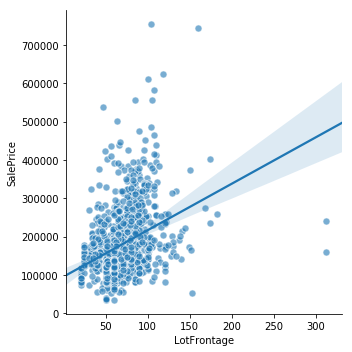

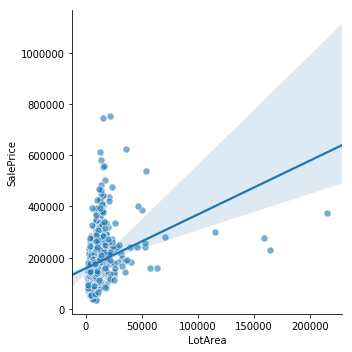

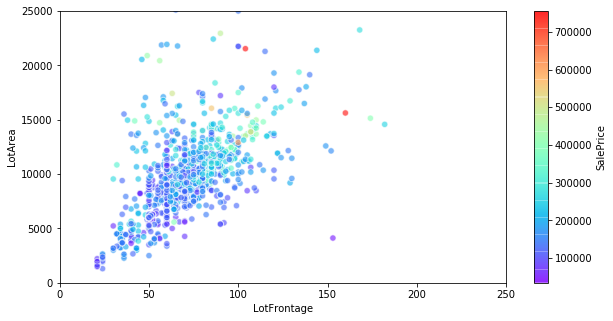

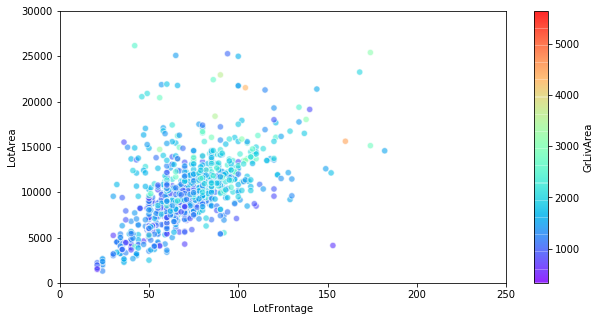

In [2549]:
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet

grid = sns.lmplot(x='LotFrontage', y='SalePrice', data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50})
plt.show()

grid = sns.lmplot(x='LotArea', y='SalePrice', data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50})
plt.show()

grid = train.plot(kind="scatter", y='LotArea', x='LotFrontage',s=40, edgecolor='w', alpha=0.6, figsize=(10,5), 
                              c="SalePrice", cmap=plt.get_cmap("rainbow"), colorbar=True, sharex=False)
grid.set_xlim(0,250)
grid.set_ylim(0,25000)
plt.show()

grid = train.plot(kind="scatter", y='LotArea', x='LotFrontage',s=40, edgecolor='w', alpha=0.6, figsize=(10,5), 
                              c="GrLivArea", cmap=plt.get_cmap("rainbow"), colorbar=True, sharex=False)

grid.set_xlim(0,250)
grid.set_ylim(0,30000)
plt.show()


Clearly there are some outliers in LotArea and LotFrontage that need to be considered.

In [2550]:
for dataset in full_data:
    dataset["LotAreaBin"] = dataset["LotArea"] // 2500 * 2500
    dataset["LotAreaBin"].where(dataset["LotAreaBin"] < 22500, 22500, inplace=True)
    
train[['LotFrontage', 'LotAreaBin']].groupby('LotAreaBin').agg(['count', 'median', 'mean', 'std'])

LotFrontage                              
                 count median        mean        std
LotAreaBin                                          
0                   37   21.0   22.783784   3.497103
2500                81   40.0   42.061728  15.934511
5000               186   60.0   57.940860  11.373357
7500               415   70.0   69.048193  12.018809
10000              297   80.0   79.255892  15.848582
12500              104   85.0   85.894231  22.827304
15000               37   85.0   89.027027  31.771306
17500               11  120.0  115.818182  21.217060
20000               12   76.0   81.916667  30.905893
22500               21   94.0  115.476190  76.607192

In [2551]:
dict_LotFrontage = train.groupby('LotAreaBin')['LotFrontage'].agg('median')

for dataset in full_data:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotAreaBin'].map(dict_LotFrontage))

C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


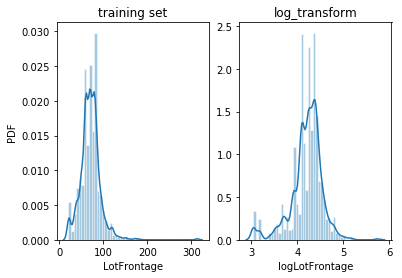

<Figure size 1080x720 with 0 Axes>

In [2552]:
train['logLotFrontage'] = np.log(train['LotFrontage'])
test['logLotFrontage'] = np.log(test['LotFrontage'])

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figure(figsize=(15,10))
grid = sns.distplot(train.LotFrontage, hist_kws={'edgecolor':'white'}, ax=ax1)
grid = sns.distplot(train.logLotFrontage, hist_kws={'edgecolor':'white'}, ax=ax2)
ax1.set_title('training set')
ax2.set_title('log_transform')
ax1.set_ylabel('PDF')
plt.show()

In [2553]:
print('LotFrontage skewness: ', train['LotFrontage'].skew())
print('LotFrontage kurtosis: ', train['LotFrontage'].kurtosis())
print()
print('log-LotFrontage skewness: ', train['logLotFrontage'].skew())
print('log-LotFrontage kurtosis: ', train['logLotFrontage'].kurtosis())

LotFrontage skewness:  1.97053456811536
LotFrontage kurtosis:  17.233874868465865

log-LotFrontage skewness:  -0.9113747958916676
log-LotFrontage kurtosis:  2.6584198008101843


C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


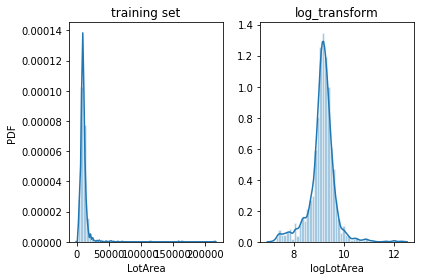

In [2554]:
train['logLotArea'] = np.log(train['LotArea'])
test['logLotArea'] = np.log(test['LotArea'])


fig, (ax1, ax2) = plt.subplots(1, 2)
grid = sns.distplot(train.LotArea, hist_kws={'edgecolor':'white'}, ax=ax1)
grid = sns.distplot(train.logLotArea, hist_kws={'edgecolor':'white'}, ax=ax2)
ax1.set_title('training set')
ax2.set_title('log_transform')
ax1.set_ylabel('PDF')
plt.tight_layout()
plt.show()

In [2555]:
print('LotArea skewness: ', train['LotArea'].skew())
print('LotArea kurtosis: ', train['LotArea'].kurtosis())
print()
print('log-LotArea skewness: ', train['logLotArea'].skew())
print('log-LotArea kurtosis: ', train['logLotArea'].kurtosis())

LotArea skewness:  12.207687851233496
LotArea kurtosis:  203.24327101886033

log-LotArea skewness:  -0.1379938086958118
log-LotArea kurtosis:  4.713358369108622


In [2556]:
corr = train.corr()
corr['logLotFrontage'].sort_values(ascending=False).head(10)
#print(corr['logLotArea']).sort_values(ascending=False).head()


logLotFrontage    1.000000
LotFrontage       0.935015
logLotArea        0.750715
LotAreaBin        0.661302
1stFlrSF          0.419780
GrLivArea         0.356947
LotArea           0.356178
logSalePrice      0.353421
TotRmsAbvGrd      0.350907
SalePrice         0.336964
Name: logLotFrontage, dtype: float64

In [2557]:
train_FeatCtrl['LotFrontage'] = 2
test_FeatCtrl['LotFrontage'] = 2
train_FeatCtrl['logLotFrontage'] = 4
test_FeatCtrl['logLotFrontage'] = 4
train_FeatCtrl['LotArea'] = 4
test_FeatCtrl['LotArea'] = 4
train_FeatCtrl['logLotArea'] = 4
test_FeatCtrl['logLotArea'] = 4
train_FeatCtrl['LotAreaBin'] = 3
test_FeatCtrl['LotAreaBin'] = 3

## GarageQual, GarageCond, GarageFinish, GarageType and GarageYrBuilt: missing 5.5% in train & 5.3% in test

**GarageQual:** Garage quality               
**GarageCond:** Garage condition                                               

Ex -	Excellent           
Gd -	Good              
TA -	Typical/Average              
Fa -	Fair              
Po -	Poor              
NA -	No Garage          

In [2558]:
print(train.GarageQual.isnull().sum())
print(train.GarageCond.isnull().sum())

81
81


In [2559]:
ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

for dataset in full_data:
    dataset[['GarageQual','GarageCond']] = dataset[['GarageQual','GarageCond']].fillna('None')
    dataset[['GarageQual_ord','GarageCond_ord']] = dataset[['GarageQual','GarageCond']].replace(ordinalQUAL_mapper)
    print(dataset['GarageQual'].value_counts())
    print(dataset['GarageCond'].value_counts())
    print()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

TA      1293
None      78
Fa        76
Gd        10
Po         2
Name: GarageQual, dtype: int64
TA      1328
None      78
Fa        39
Po         7
Gd         6
Ex         1
Name: GarageCond, dtype: int64



In [2560]:
corr = train.corr()
corr['GarageQual_ord'].sort_values(ascending=False).head(10)

GarageQual_ord     1.000000
GarageCond_ord     0.959172
GarageCars         0.576622
GarageArea         0.558938
logSalePrice       0.363259
GarageYrBlt        0.308257
OverallQual        0.292399
YearBuilt          0.287054
SalePrice          0.273839
FireplaceQu_ord    0.221797
Name: GarageQual_ord, dtype: float64

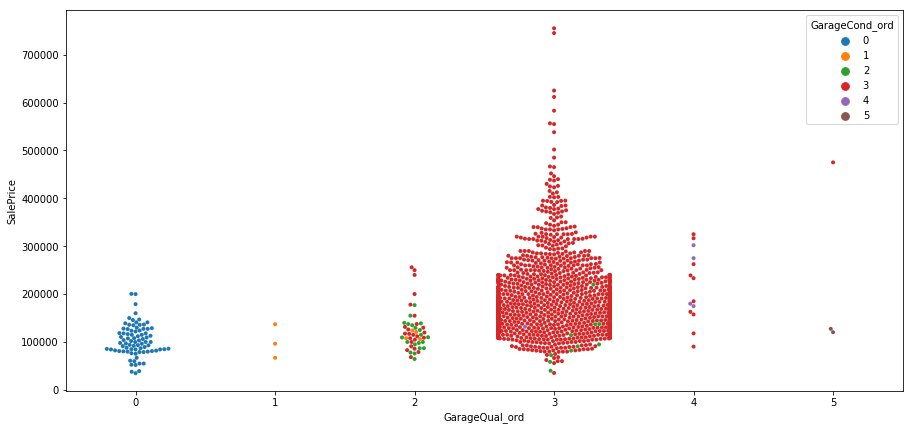

"ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}"

In [2561]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='GarageQual_ord', y='SalePrice', data=train, hue='GarageCond_ord', size=4)
plt.show()

'''ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}'''

In [2562]:
# GarageQual and GarageCond are highly corrolated

train_FeatCtrl['GarageQual'] = 3
test_FeatCtrl['GarageQual'] = 3
train_FeatCtrl['GarageQual_ord'] = 4
test_FeatCtrl['GarageQual_ord'] = 4
train_FeatCtrl['GarageCond'] = 3
test_FeatCtrl['GarageCond'] = 3
train_FeatCtrl['GarageCond_ord'] = 3
test_FeatCtrl['GarageCond_ord'] = 3

----------------------
**GarageFinish:** Interior finish of the garage (NA: No Garage)                                       

Fin -	Finished                    
RFn -	Rough Finished	                  
Unf -	Unfinished                   
NA -	No Garage                  

In [2563]:
print(train.GarageFinish.value_counts(dropna=False))
print()
print(test.GarageFinish.value_counts(dropna=False))

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64


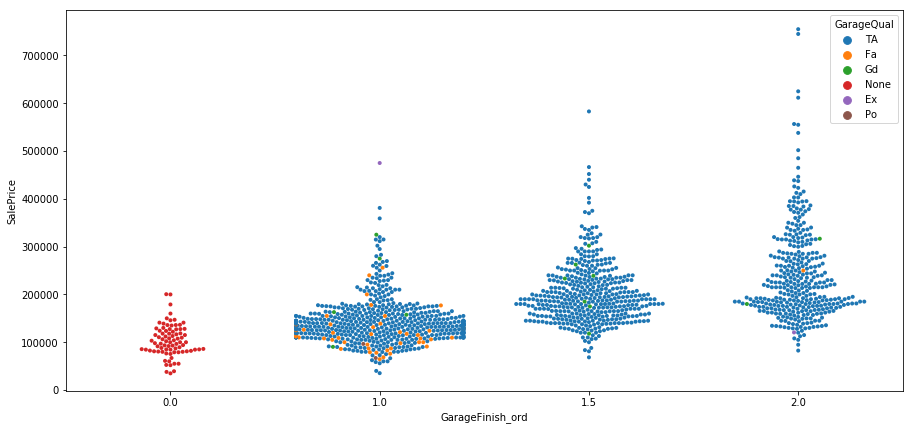

In [2564]:
ordinalFIN_mapper = {'Fin': 2, 'RFn':1.5, 'Unf':1, 'None':0}

for dataset in full_data:
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna('None')
    dataset['GarageFinish_ord'] = dataset['GarageFinish'].replace(ordinalFIN_mapper)
    
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='GarageFinish_ord', y='SalePrice', data=train, hue='GarageQual', size=4)
plt.show()



In [2565]:
corr = train.corr()
corr['GarageFinish_ord'].sort_values(ascending=False).head(10)

GarageFinish_ord    1.000000
GarageCars          0.636249
GarageCond_ord      0.634270
GarageQual_ord      0.633942
logSalePrice        0.602067
YearBuilt           0.573463
GarageArea          0.572534
OverallQual         0.546329
SalePrice           0.534017
GarageYrBlt         0.525408
Name: GarageFinish_ord, dtype: float64

In [2566]:
train_FeatCtrl['GarageFinish'] = 3
test_FeatCtrl['GarageFinish'] = 3
train_FeatCtrl['GarageFinish_ord'] = 4
test_FeatCtrl['GarageFinish_ord'] = 4

------------------------------
**GarageYrBlt:** Year garage was built (NA: No Garage)

In [2567]:
train.GarageYrBlt.isnull().sum()

81

Obviously houses with no Garage have NaN value. What to do?                
(a) Fill with mean;             
(b) Fill with random values over a gaussian distribuition;                   
(c) Categorize GarageYrBlt with one being "no info";                   
(d) Fill with the house's construction date (following the same "pattern" as for 'YearRemodAdd': same as construction date if no remodeling or additions)

In [2568]:
print(corr['GarageYrBlt'].sort_values(ascending=False).head(10))
print(corr['GarageYrBlt'].sort_values(ascending=False).tail(5))

GarageYrBlt         1.000000
YearBuilt           0.825667
YearRemodAdd        0.642277
GarageCars          0.588920
GarageArea          0.564567
OverallQual         0.547766
logSalePrice        0.541073
GarageFinish_ord    0.525408
SalePrice           0.486362
FullBath            0.484557
Name: GarageYrBlt, dtype: float64
KitchenAbvGr    -0.124411
AlleyBin        -0.166670
FenceBin        -0.241250
EnclosedPorch   -0.297003
OverallCond     -0.324297
Name: GarageYrBlt, dtype: float64


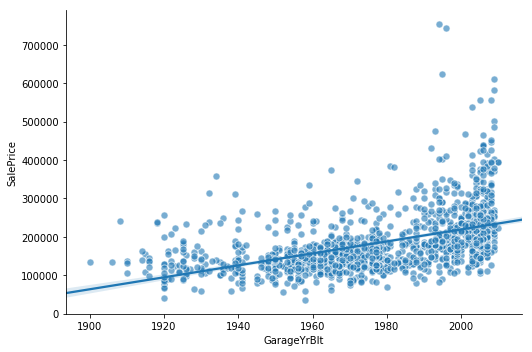

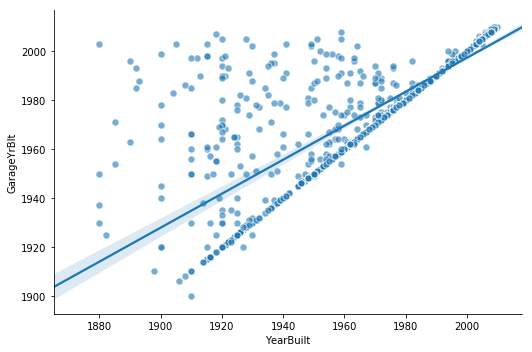

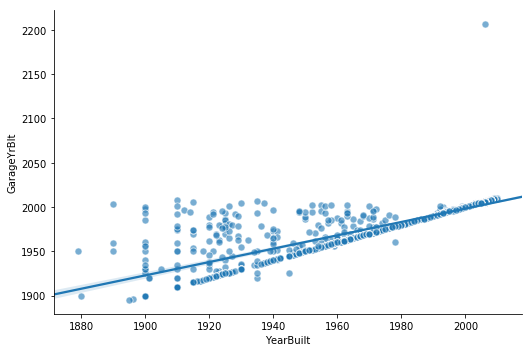

In [2569]:
grid = sns.lmplot(x="GarageYrBlt", y="SalePrice", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
                  size=5, aspect=1.5)
plt.show()

grid = sns.lmplot(x="YearBuilt", y="GarageYrBlt", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
                  size=5, aspect=1.5)
plt.show()

grid = sns.lmplot(x="YearBuilt", y="GarageYrBlt", data=test, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
                  size=5, aspect=1.5)
plt.show()

In [2570]:
# there is an outlier in the testset

test.loc[test['GarageYrBlt']>2200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord
1132,2593,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,None,None,None,0,9,2007,New,Partial,0,0,1,4,7500,4.219508,9.02377,3,3,1.5


In [2571]:
test.loc[1132, 'GarageYrBlt'] = 2007
test.loc[1132, 'GarageYrBlt']

2007.0

Filling NaN with the same as house's construction date

In [2572]:
for dataset in full_data:
    dataset['GarageYrBlt'] = dataset.GarageYrBlt.fillna(dataset.YearBuilt)

In [2573]:
corr['GarageYrBlt'].sort_values(ascending=False).head(10)

GarageYrBlt         1.000000
YearBuilt           0.825667
YearRemodAdd        0.642277
GarageCars          0.588920
GarageArea          0.564567
OverallQual         0.547766
logSalePrice        0.541073
GarageFinish_ord    0.525408
SalePrice           0.486362
FullBath            0.484557
Name: GarageYrBlt, dtype: float64

In [2574]:
train_FeatCtrl['GarageYrBlt'] = 2
test_FeatCtrl['GarageYrBlt'] = 2

-----------------------
**GarageType:** Garage location 

2Types -	More than one type of garage                
Attchd -	Attached to home        
Basment -	Basement Garage                                                       
BuiltIn -	Built-In (Garage part of house - typically has room above garage)                
CarPort -	Car Port                 
Detchd -	Detached from home             
NA -    	No Garage             

In [2575]:
print(train.GarageType.value_counts(dropna=False))
print()
print(test.GarageType.value_counts(dropna=False))

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Attchd     853
Detchd     392
BuiltIn     98
NaN         76
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


Filling the missing values with "NA"

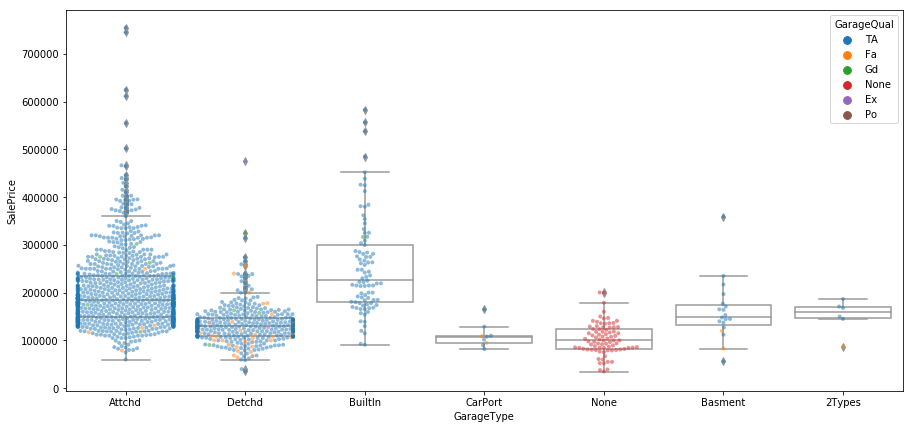

In [2576]:
for dataset in full_data:
    dataset['GarageType'] = dataset['GarageType'].fillna('None')

plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='GarageType', y='SalePrice', data=train, hue='GarageQual', size=4, alpha=.5)
grid = sns.boxplot(x='GarageType', y='SalePrice', data=train, color='1')
plt.show()

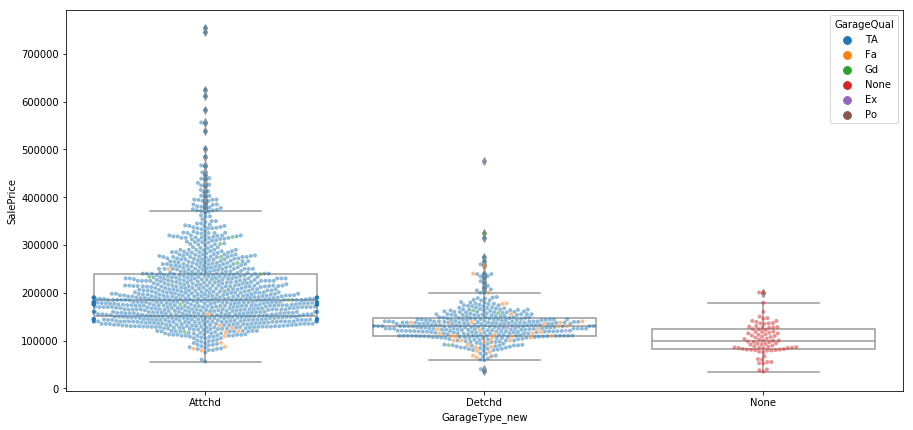

In [2577]:
for dataset in full_data:
    dataset['GarageType_new'] = dataset['GarageType'].replace(['BuiltIn', 'CarPort', 'Basment', '2Types'], 'Attchd')

plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='GarageType_new', y='SalePrice', data=train, hue='GarageQual', size=4, alpha=.5)
grid = sns.boxplot(x='GarageType_new', y='SalePrice', data=train, color='1')
plt.show()

In [2578]:
train_FeatCtrl['GarageType'] = 3
test_FeatCtrl['GarageType'] = 3
train_FeatCtrl['GarageType_new'] = 4
test_FeatCtrl['GarageType_new'] = 4

In [2579]:
train[['YearBuilt', 'GarageCond','GarageFinish','GarageQual','GarageYrBlt','GarageType_new']].sample(20,random_state=1)

,YearBuilt,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GarageType_new
258,2001,TA,RFn,TA,2001.0,Attchd
267,1939,TA,Unf,TA,1939.0,Detchd
288,1967,TA,Unf,TA,1970.0,Detchd
649,1970,None,None,None,1970.0,None
1233,1959,TA,RFn,TA,1959.0,Attchd
167,2007,TA,Fin,TA,2007.0,Attchd
926,2003,TA,Fin,TA,2003.0,Attchd
831,2005,TA,RFn,TA,2005.0,Detchd
1237,2004,TA,Fin,TA,2004.0,Attchd
426,1989,TA,Fin,TA,1989.0,Attchd


There is some samples which aparently have no garage, but have a value for GarageYrBuilt, like sample 649. Maybe the garage was demolished? Should we keep like this?

In [2580]:
# I guess there was some confusion regarding the row 649
train_raw.loc[649, 'GarageYrBlt']

nan

## Basement features: missing less then 5%

**BsmtQual:** Evaluates the height of the basement          
Ex -	Excellent (100+ inches)	               
Gd -	Good (90-99 inches)               
TA -	Typical (80-89 inches)              
Fa -	Fair (70-79 inches)            
Po -	Poor (<70 inches              
NA -	No Basement                                                
		
**BsmtCond:** Evaluates the general condition of the basement             
Ex -	Excellent              
Gd -	Good                                
TA -	Typical - slight dampness allowed               
Fa -	Fair - dampness or some cracking or settling              
Po -	Poor - Severe cracking, settling, or wetness                 
NA -	No Basement                                         
	 
**BsmtExposure:** Refers to walkout or garden level walls                  
Gd -	Good Exposure                                                                   
Av -	Average Exposure (split levels or foyers typically score average or above)	                
Mn -	Mimimum Exposure                      
No -	No Exposure                     
NA -	No Basement                    
	
**BsmtFinType1:** Rating of basement finished area              
GLQ -	Good Living Quarters                   
ALQ -	Average Living Quarters                       
BLQ -	Below Average Living Quarters	                  
Rec -	Average Rec Room                     
LwQ -	Low Quality                      
Unf -	Unfinshed                      
NA -	No Basement                            
		
**BsmtFinSF1:** Type 1 finished square feet                

**BsmtFinType2:** Rating of basement finished area (if multiple types)                     
GLQ -	Good Living Quarters                
ALQ -	Average Living Quarters                 
BLQ -	Below Average Living Quarters	                 
Rec -	Average Rec Room                   
LwQ -	Low Quality                 
Unf -	Unfinshed                  
NA -	No Basement                   

**BsmtFinSF2:** Type 2 finished square feet                   

**BsmtUnfSF:** Unfinished square feet of basement area                   

**TotalBsmtSF:** Total square feet of basement area                 

In [2581]:
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',\
            'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for item in basement:
    if item in train_cat_cols:
        print(train[item].value_counts(dropna=False))
        print()

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64



In [2582]:
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',\
            'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for item in basement:
    if item in train_cat_cols:
        print(test[item].value_counts(dropna=False))
        print()

TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64

TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64

No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64



**Training set:** BsmtExposure and BsmtFinType2 have one more missing value than the other features that we need to check.

In [2583]:
train[(train['BsmtExposure'].isnull()) & (train['BsmtQual'].isnull()==False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
948,949,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,None,None,None,0,2,2006,WD,Normal,192500,12.167851,0,0,1,3,12500,4.174387,9.547241,3,3,1.5,Attchd


In [2584]:
train[(train['BsmtFinType2'].isnull()) & (train['BsmtQual'].isnull()==False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
332,333,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2009,WD,Normal,284000,12.55673,0,0,1,4,10000,4.442651,9.273785,3,3,1.5,Attchd


In [2585]:
train.loc[948, 'BsmtExposure'] = 'No'
train.loc[332, 'BsmtFinType2'] = 'Rec'

**Test set:** BsmtCond has one more missing value than the other features that we need to check.

In [2586]:
test[(test['BsmtCond'].isnull()) & (test['BsmtQual'].isnull()==False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
580,2041,20,RL,103.0,16280,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,None,GdWo,None,0,5,2008,WD,Normal,0,1,1,4,15000,4.634729,9.697693,3,3,1.5,Attchd
725,2186,20,RL,65.0,6500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,None,None,None,0,5,2008,WD,Normal,0,0,1,1,5000,4.174387,8.779557,3,3,1.0,Detchd
1064,2525,80,RL,72.0,9720,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,6,2007,WD,Normal,0,1,1,2,7500,4.276666,9.181941,3,3,1.0,Detchd


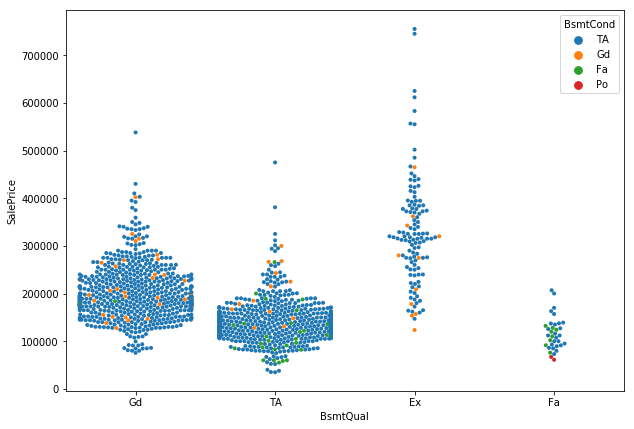

In [2587]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(x='BsmtQual', y='SalePrice', data=train, hue='BsmtCond', size=4)
plt.show()

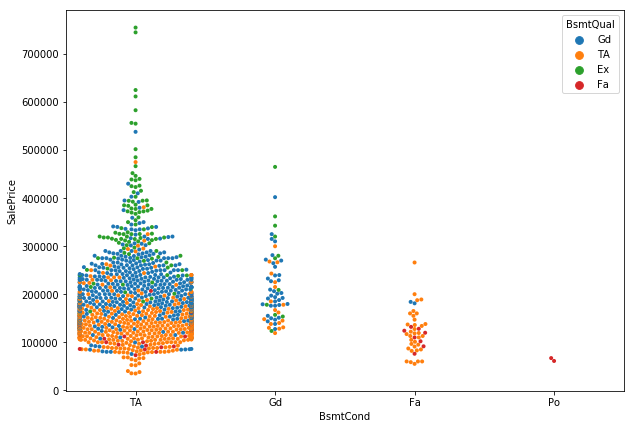

In [2588]:
plt.figure(figsize=(10,7))
grid = sns.swarmplot(x='BsmtCond', y='SalePrice', data=train, hue='BsmtQual', size=4)
plt.show()

In [2589]:
bsmtcond_index = list(test[(test['BsmtCond'].isnull()) & (test['BsmtQual'].isnull()==False)].index)
test.loc[bsmtcond_index, 'BsmtCond'] = 'TA'

In [2590]:
test[(test['BsmtCond'].isnull()==False) & (test['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
757,2218,70,C (all),60.0,5280,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,None,None,None,0,7,2008,WD,Normal,0,0,0,0,5000,4.094345,8.571681,2,3,1.0,Detchd
758,2219,50,C (all),52.0,5150,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,0,0,0,0,5000,3.951244,8.546752,1,2,1.0,Detchd


In [2591]:
bsmtqual_index = list(test[(test['BsmtCond'].isnull()==False) & (test['BsmtQual'].isnull())].index)
test.loc[bsmtqual_index, 'BsmtQual'] = 'TA'

In [2592]:
test[(test['BsmtExposure'].isnull()) & (test['BsmtQual'].isnull()==False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
27,1488,20,RL,73.0,8987,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,0,0,1,4,7500,4.290459,9.103534,3,3,1.5,Attchd
888,2349,60,FV,81.0,10411,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,None,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2007,New,Partial,0,0,0,0,10000,4.394449,9.250618,3,3,1.0,Attchd


In [2593]:
test.loc[[27, 888], 'BsmtExposure'] = 'No'

In [2594]:
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',\
            'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for item in basement:
    if item in train_cat_cols:
        print(test[item].value_counts(dropna=False))
        print()

TA     636
Gd     591
Ex     137
Fa      53
NaN     42
Name: BsmtQual, dtype: int64

TA     1298
Fa       59
Gd       57
NaN      42
Po        3
Name: BsmtCond, dtype: int64

No     953
Av     197
Gd     142
Mn     125
NaN     42
Name: BsmtExposure, dtype: int64

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64



Again let us consider the missing values in the categorical features of basement as the lack of basement: Fill with NA.

In [2595]:
for dataset in full_data:
    for item in basement:
        if item in train_cat_cols: # i didn't think much, but i guess there is no problem using train_cat_cols for both of them
            dataset[item] = dataset[item].fillna('None')

Now checking the numerical features of basement.

In [2596]:
# missing values
for dataset in full_data:
    for item in basement:
        if item in train_num_cols:
            print(item, dataset[item].isnull().sum())
    print('\n')

BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0


BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1




In [2597]:
test[test.BsmtFinSF1.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml,0,1,0,0,5000,4.59512,8.689464,3,3,1.0,Detchd


In [2598]:
for item in basement:
    if item in train_num_cols: 
        test[item] = test[item].fillna(0)

In [2599]:
# corrlation with SalePrice
for item in basement:
    if item in train_num_cols:
        print(item, corr['SalePrice'][item])

BsmtFinSF1 0.38641980624215627
BsmtFinSF2 -0.011378121450215216
BsmtUnfSF 0.214479105546969
TotalBsmtSF 0.6135805515591944


In [2600]:
train['BsmtFinSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
test['BsmtFinSF'] = test['BsmtFinSF1'] + test['BsmtFinSF2']

corr = train.corr()
corr['BsmtFinSF'].sort_values(ascending=False).head(10)

BsmtFinSF       1.000000
BsmtFinSF1      0.941000
BsmtFullBath    0.675698
TotalBsmtSF     0.535959
1stFlrSF        0.460035
SalePrice       0.366328
logSalePrice    0.358029
BsmtFinSF2      0.290821
GarageArea      0.278316
Fireplaces      0.264984
Name: BsmtFinSF, dtype: float64

In [2601]:
# checking for remaining missing values
for dataset in full_data:
    for item in basement:
        print(item, dataset[item].isnull().sum())
    print('\n')

BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0


BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0




In [2602]:
ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

for dataset in full_data:
    dataset[['BsmtQual_ord', 'BsmtCond_ord']] = dataset[['BsmtQual', 'BsmtCond']].replace(ordinalQUAL_mapper)
    print(dataset['BsmtQual_ord'].value_counts())
    print()
    print(dataset['BsmtCond_ord'].value_counts())

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual_ord, dtype: int64

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond_ord, dtype: int64
3    636
4    591
5    137
2     53
0     42
Name: BsmtQual_ord, dtype: int64

3    1298
2      59
4      57
0      42
1       3
Name: BsmtCond_ord, dtype: int64


In [2603]:
ordinalEXPO_mapper = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0}

for dataset in full_data:
    dataset['BsmtExposure_ord'] = dataset['BsmtExposure'].replace(ordinalEXPO_mapper)
    print(dataset['BsmtExposure_ord'].value_counts())
    print()

1    954
3    221
4    134
2    114
0     37
Name: BsmtExposure_ord, dtype: int64

1    953
3    197
4    142
2    125
0     42
Name: BsmtExposure_ord, dtype: int64



In [2604]:
for item in basement:
    train_FeatCtrl['BsmtQual'] = 3
    test_FeatCtrl['BsmtQual'] = 3
    train_FeatCtrl['BsmtQual_ord'] = 4
    test_FeatCtrl['BsmtQual_ord'] = 4
    train_FeatCtrl['BsmtCond'] = 3
    test_FeatCtrl['BsmtCond'] = 3
    train_FeatCtrl['BsmtCond_ord'] = 3
    test_FeatCtrl['BsmtCond_ord'] = 3
    train_FeatCtrl['Exposure'] = 3
    test_FeatCtrl['Exposure'] = 3
    train_FeatCtrl['Exposure_ord'] = 4
    test_FeatCtrl['Exposure_ord'] = 4
    train_FeatCtrl['BsmtFinType1'] = 2
    test_FeatCtrl['BsmtFinType1'] = 2
    train_FeatCtrl['BsmtFinSF1'] = 3
    test_FeatCtrl['BsmtFinSF1'] = 3
    train_FeatCtrl['BsmtFinType2'] = 3
    test_FeatCtrl['BsmtFinType2'] = 3
    train_FeatCtrl['BsmtFinSF2'] = 3
    test_FeatCtrl['BsmtFinSF2'] = 3
    train_FeatCtrl['BsmtFinSF'] = 4
    test_FeatCtrl['BsmtFinSF'] = 4
    train_FeatCtrl['BsmtUnfSF'] = 2
    test_FeatCtrl['BsmtUnfSF'] = 2
    train_FeatCtrl['TotalBsmtSF'] = 2
    test_FeatCtrl['TotalBsmtSF'] = 2

## Other features: MasVnrArea, MasVnrType, Electrical, MSZoning

**MasVnrType:** Masonry veneer type                
BrkCmn -	Brick Common                   
BrkFace -	Brick Face                  
CBlock -	Cinder Block                 
None -	None                    
Stone -	Stone                   
	
**MasVnrArea:** Masonry veneer area in square feet                      

In [2605]:
otherFeat = ['MasVnrArea', 'MasVnrType', 'Electrical', 'MSZoning']
#numerical
for dataset in full_data:
    for item in otherFeat:
            print(item,dataset[item].isnull().sum())

MasVnrArea 8
MasVnrType 8
Electrical 1
MSZoning 0
MasVnrArea 15
MasVnrType 16
Electrical 0
MSZoning 4


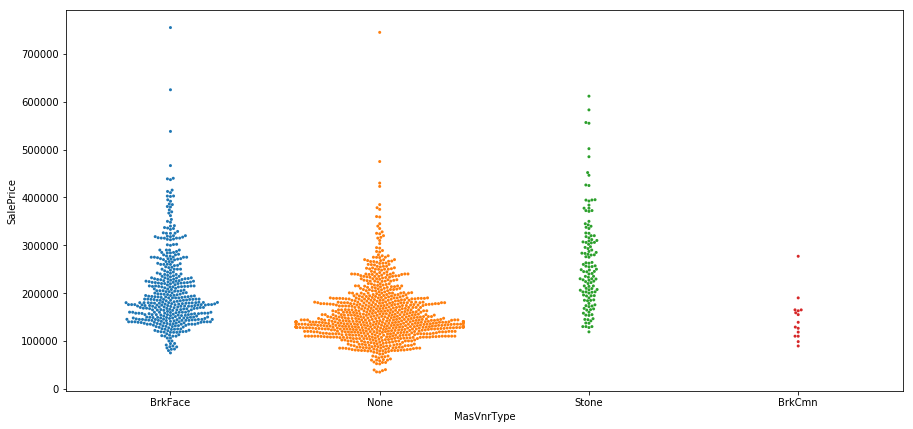

In [2606]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='MasVnrType', y='SalePrice', data=train, size=3)
plt.show()

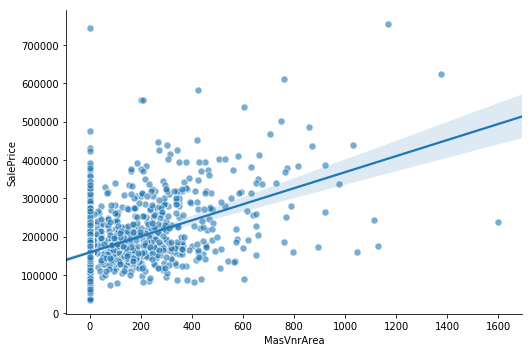

In [2607]:
grid = sns.lmplot(x="MasVnrArea", y="SalePrice", data=train, scatter_kws={'edgecolor':'w', 'alpha':0.6, 's':50}, 
                  size=5, aspect=1.5)
plt.show()

In [2608]:
test[test.MasVnrType.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new,BsmtFinSF,BsmtQual_ord,BsmtCond_ord,BsmtExposure_ord
231,1692,60,RL,85.0,12891,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,None,None,None,0,7,2009,WD,Normal,0,0,1,4,12500,4.442651,9.464285,3,3,2.0,Attchd,651.0,5,3,1
246,1707,20,FV,90.0,7993,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,None,None,None,0,10,2009,New,Partial,0,0,0,0,7500,4.499810,8.986321,3,3,2.0,Attchd,0.0,5,3,1
422,1883,60,RL,70.0,8749,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,None,None,None,0,11,2009,WD,Normal,0,0,0,0,7500,4.248495,9.076695,3,3,1.5,Attchd,0.0,4,3,1
532,1993,60,RL,70.0,7750,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,None,None,None,0,4,2008,WD,Normal,0,0,1,4,7500,4.248495,8.955448,3,3,2.0,Attchd,0.0,4,3,1
544,2005,20,RL,87.0,10037,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,None,None,None,0,8,2008,WD,Normal,0,0,1,4,10000,4.465908,9.214034,3,3,2.0,Attchd,666.0,5,3,1
581,2042,60,FV,70.0,7500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,None,None,None,0,4,2008,WD,Normal,0,0,1,3,7500,4.248495,8.922658,3,3,1.5,Attchd,0.0,4,3,1
851,2312,60,RL,59.0,15810,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,None,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2007,New,Partial,0,0,0,0,15000,4.077537,9.668398,3,3,1.0,Attchd,0.0,4,3,1
865,2326,80,RL,80.0,11950,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf

In [2609]:
test.loc[1150, 'MasVnrType'] = 'BrkFace'
for dataset in full_data:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

-------------------
**Electrical:** Electrical system                 
SBrkr -	Standard Circuit Breakers & Romex                       
FuseA -	Fuse Box over 60 AMP and all Romex wiring (Average)	              
FuseF -	60 AMP Fuse Box and mostly Romex wiring (Fair)                 
FuseP -	60 AMP Fuse Box and mostly knob & tube wiring (poor)            
Mix -	Mixed 

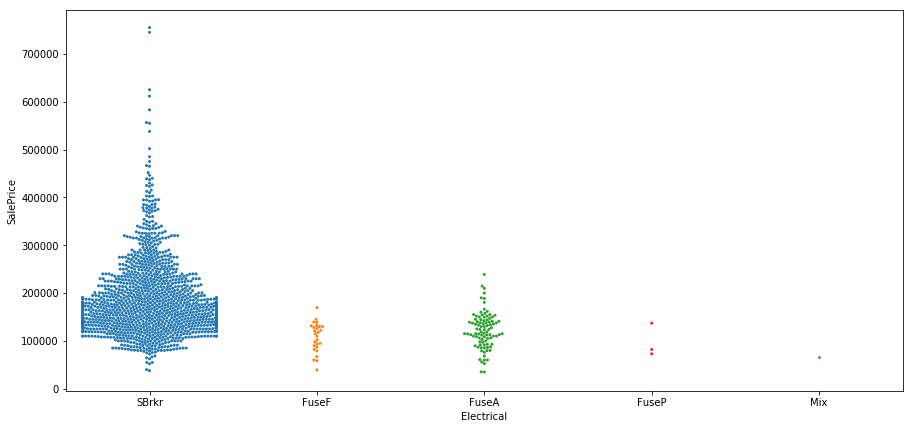

In [2610]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='Electrical', y='SalePrice', data=train, size=3)
plt.show()

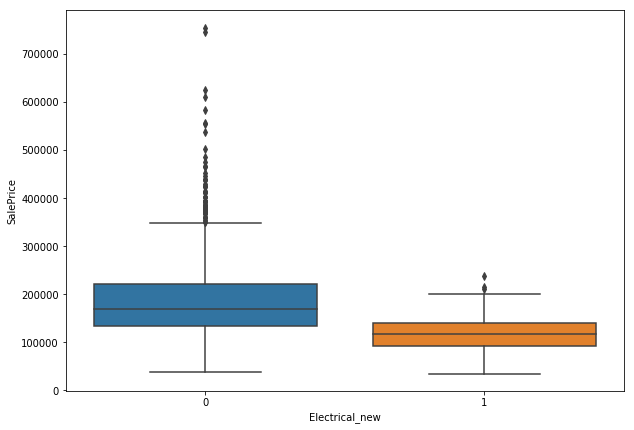

In [2611]:
for dataset in full_data:
    dataset['Electrical'] = dataset['Electrical'].fillna('SBrkr')
    dataset['Electrical_new'] = dataset['Electrical'].replace(['FuseF', 'FuseA', 'FuseP', 'Mix'], 1)
    dataset['Electrical_new'] = dataset['Electrical_new'].replace('SBrkr', 0)

plt.figure(figsize=(10,7))
grid = sns.boxplot(x='Electrical_new', y='SalePrice', data=train)
plt.show()

-----------------
**MSZoning:** Identifies the general zoning classification of the sale.                    
A -	Agriculture               
C -	Commercial                            
FV -	Floating Village Residential                
I -	Industrial                          
RH -	Residential High Density                
RL -	Residential Low Density                  
RP -	Residential Low Density Park                    
RM -	Residential Medium Density       

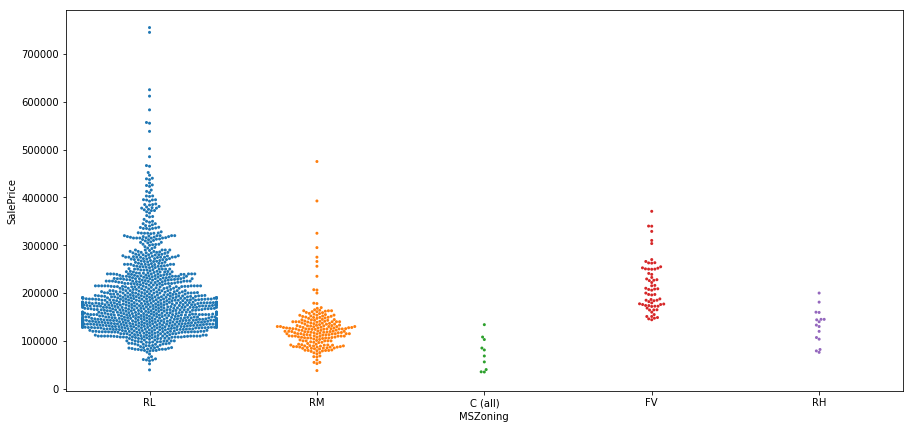

In [2612]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='MSZoning', y='SalePrice', data=train, size=3)
plt.show()

In [2613]:
for dataset in full_data:
    dataset['MSZoning'] = dataset['MSZoning'].fillna('RL')

In [2614]:
train_FeatCtrl['MasVnrType'] = 2
test_FeatCtrl['MasVnrType'] = 2
train_FeatCtrl['MasVnrArea'] = 2
test_FeatCtrl['MasVnrArea'] = 2
train_FeatCtrl['Electrical'] = 3
test_FeatCtrl['Electrical'] = 3
train_FeatCtrl['Electrical_new'] = 4
test_FeatCtrl['Electrical_new'] = 4
train_FeatCtrl['MSZoning'] = 2
test_FeatCtrl['MSZoning'] = 2

In [2615]:
#train
train_total_mis = train.isnull().sum().sort_values(ascending=False)
train_perc = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
train_mis_data = pd.concat([train_total_mis, train_perc], axis=1, keys=['TrainTotalMissing', 'TrainPercentMissing'])

train_mis_data.head(10)

,TrainTotalMissing,TrainPercentMissing
Electrical_new,0,0.0
Exterior2nd,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0


In [2616]:
# test
test_total_mis = test.isnull().sum().sort_values(ascending=False)
test_perc = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_mis_data = pd.concat([test_total_mis, test_perc], axis=1, keys=['TestTotalMissing', 'TestPercentMissing'])
test_mis_data.head(15)

,TestTotalMissing,TestPercentMissing
BsmtFullBath,2,0.001371
Utilities,2,0.001371
BsmtHalfBath,2,0.001371
Functional,2,0.001371
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
Exterior2nd,1,0.000685
SaleType,1,0.000685
Exterior1st,1,0.000685


## Other features 2 - test set

**Utilities:** Type of utilities available              
AllPub -	All public Utilities (E,G,W,& S)	                 
NoSewr -	Electricity, Gas, and Water (Septic Tank)             
NoSeWa -	Electricity and Gas Only            
ELO -	Electricity only                        

In [2617]:
print(test.Utilities.value_counts(dropna=False))

AllPub    1457
NaN          2
Name: Utilities, dtype: int64


In [2618]:
test['Utilities'] = test.Utilities.fillna('AllPub')

--------------------
**BsmtHalfBath:** Basement half bathrooms

**BsmtFullBath:** Basement full bathrooms

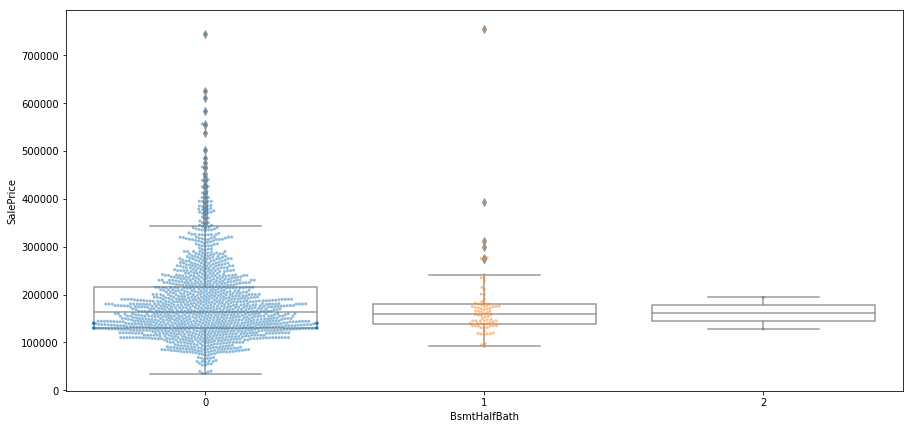

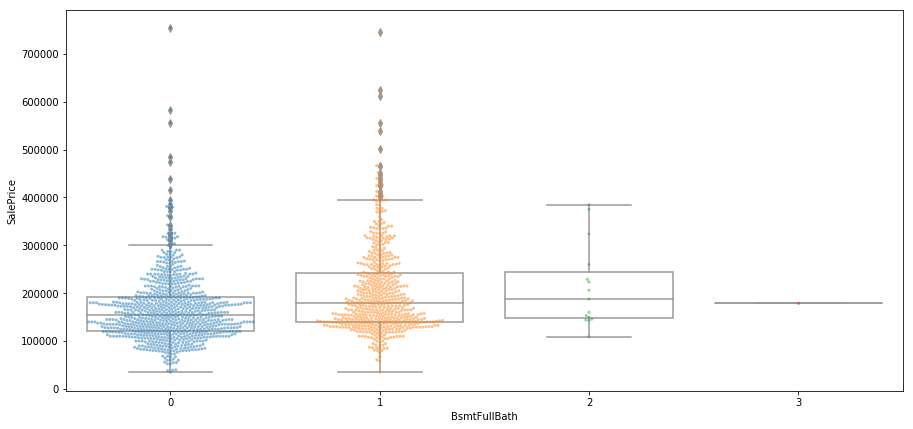

In [2619]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='BsmtHalfBath', y='SalePrice', data=train, size=3, alpha=.5)
grid = sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=train, color='1')
plt.show()

plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='BsmtFullBath', y='SalePrice', data=train, size=3, alpha=.5)
grid = sns.boxplot(x='BsmtFullBath', y='SalePrice', data=train, color='1')
plt.show()

In [2620]:
corr = train.corr()
print(corr['BsmtFullBath'].sort_values(ascending=False).head(10))
print()
print(corr['BsmtHalfBath'].sort_values(ascending=False).head(10))

BsmtFullBath        1.000000
BsmtFinSF           0.675698
BsmtFinSF1          0.649212
BsmtExposure_ord    0.338376
TotalBsmtSF         0.307351
1stFlrSF            0.244671
logSalePrice        0.236224
SalePrice           0.227122
BsmtQual_ord        0.223495
YearBuilt           0.187599
Name: BsmtFullBath, dtype: float64

BsmtHalfBath        1.000000
OverallCond         0.117821
BsmtFinSF           0.088625
BsmtExposure_ord    0.078078
BsmtFinSF2          0.070948
BsmtFinSF1          0.067418
BsmtCond_ord        0.064811
LotArea             0.048046
BedroomAbvGr        0.046519
LotAreaBin          0.045626
Name: BsmtHalfBath, dtype: float64


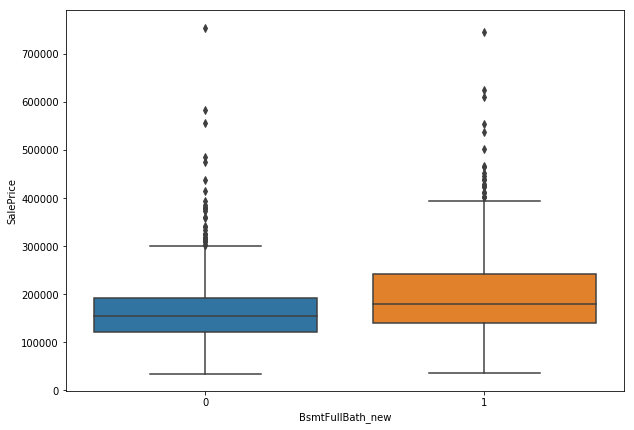

In [2621]:
for dataset in full_data:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)
    dataset['BsmtFullBath_new'] = dataset['BsmtFullBath'].where(dataset['BsmtFullBath'] < 1, 1)

plt.figure(figsize=(10,7))
grid = sns.boxplot(x='BsmtFullBath_new', y='SalePrice', data=train)
plt.show()

In [2622]:
train.BsmtFullBath_new.value_counts()

0    856
1    604
Name: BsmtFullBath_new, dtype: int64

-----------------
**Functional:** Home functionality (Assume typical unless deductions are warranted)      
Typ -	Typical Functionality            
Min1 -	Minor Deductions 1             
Min2 -	Minor Deductions 2            
Mod -	Moderate Deductions            
Maj1 -	Major Deductions 1            
Maj2 -	Major Deductions 2            
Sev -	Severely Damaged            
Sal -	Salvage only 

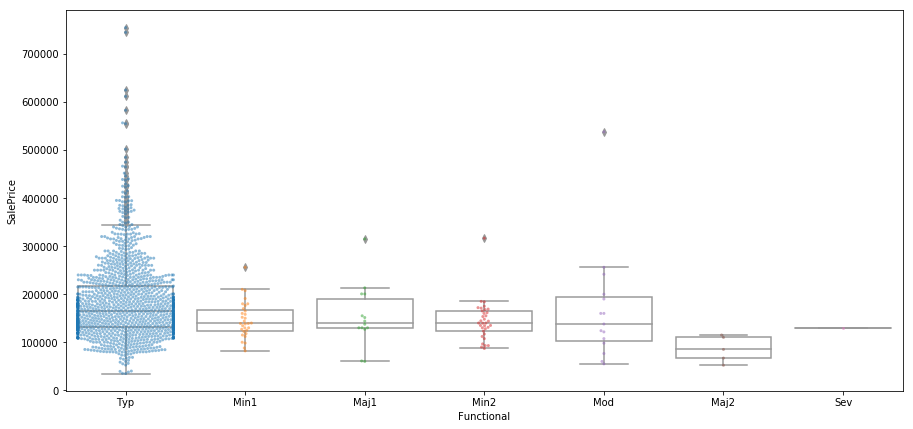

In [2623]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='Functional', y='SalePrice', data=train, size=3, alpha=.5)
grid = sns.boxplot(x='Functional', y='SalePrice', data=train, color='1')
plt.show()

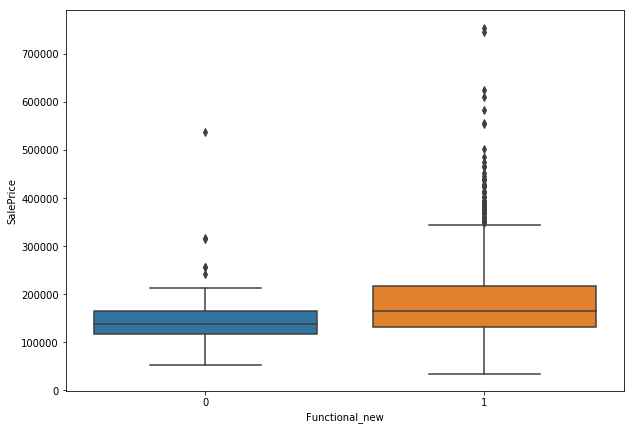

In [2624]:
for dataset in full_data:
    dataset['Functional'] = dataset['Functional'].fillna('Typ')
    dataset['Functional_new'] = dataset['Functional'].replace('Typ', 1)
    dataset['Functional_new'] = dataset['Functional_new'].replace(['Min1','Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], 0)

plt.figure(figsize=(10,7))
grid = sns.boxplot(x='Functional_new', y='SalePrice', data=train)
plt.show()

In [2625]:
corr=train.corr()
corr['Functional_new'].sort_values(ascending=False).head(10)

Functional_new      1.000000
OverallQual         0.174427
YearBuilt           0.174034
BsmtQual_ord        0.173014
BsmtCond_ord        0.154715
GarageYrBlt         0.150519
logSalePrice        0.133545
SalePrice           0.116462
GarageFinish_ord    0.111783
MasVnrArea          0.090769
Name: Functional_new, dtype: float64

--------------
**Exterior1st:** Exterior covering on house     
**Exterior2nd:** Exterior covering on house (if more than one material)           
       AsbShng -	Asbestos Shingles              
       AsphShn -	Asphalt Shingles              
       BrkComm -	Brick Common               
       BrkFace -	Brick Face               
       CBlock -	Cinder Block              
       CemntBd -	Cement Board              
       HdBoard -	Hard Board                
       ImStucc -	Imitation Stucco            
       MetalSd -	Metal Siding             
       Other -	Other               
       Plywood -	Plywood               
       PreCast -	PreCast	             
       Stone -	Stone               
       Stucco -	Stucco                 
       VinylSd -	Vinyl Siding             
       Wd Sdng -	Wood Siding              
       WdShing -	Wood Shingles               

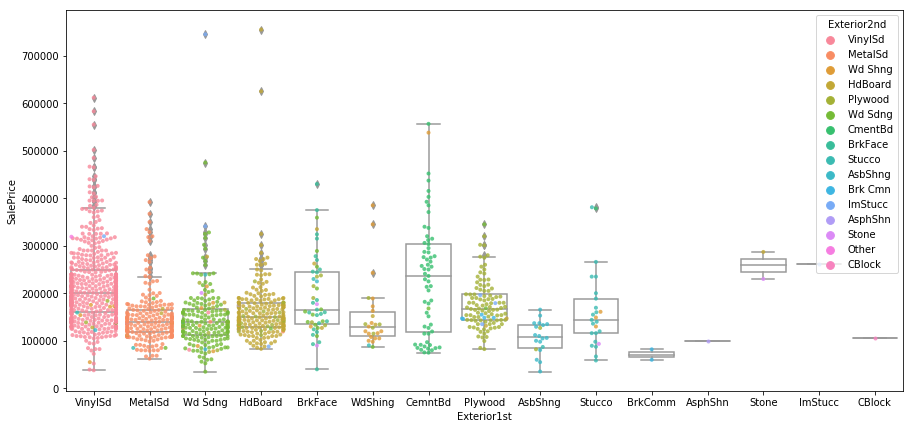

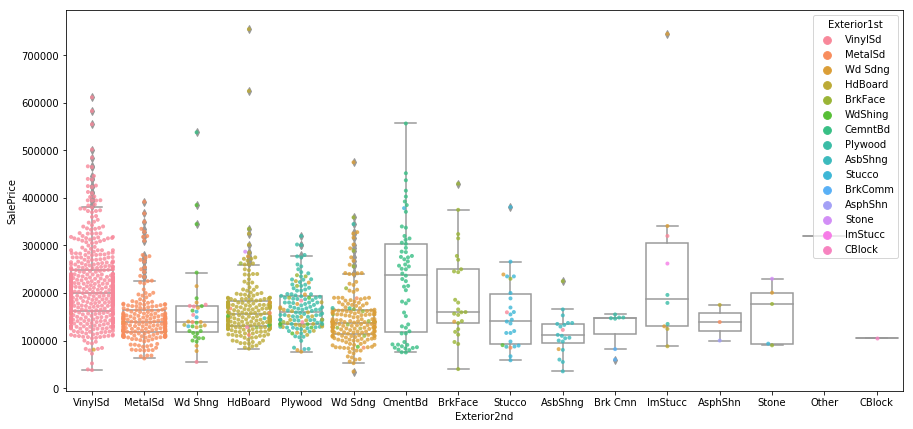

In [2626]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='Exterior1st', y='SalePrice', data=train, hue='Exterior2nd', size=4, alpha=.8)
grid = sns.boxplot(x='Exterior1st', y='SalePrice', data=train, color='1')
plt.show()

plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='Exterior2nd', y='SalePrice', data=train, hue='Exterior1st', size=4, alpha=.8)
grid = sns.boxplot(x='Exterior2nd', y='SalePrice', data=train, color='1')
plt.show()

In [2627]:
for dataset in full_data:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna('VinylSd')
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna('VinylSd')
    dataset['Exterior1st_new'] = dataset['Exterior1st'].replace(['BrkComm', 'AsphShn', 'Stone', 'ImStucc', 
                                                                 'CBlock', 'Other', 'PreCast'], 'Others')

--------------
**GarageCars:** Size of garage in car capacity

**GarageArea:** Size of garage in square feet

In [2628]:
test[test.GarageArea.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new,BsmtFinSF,BsmtQual_ord,BsmtCond_ord,BsmtExposure_ord,Electrical_new,BsmtFullBath_new,Functional_new,Exterior1st_new
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1923.0,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca,0,1,0,0,7500,3.912023,9.111624,0,0,0.0,Detchd,548.0,4,3,1,0,0.0,1,Wd Sdng


In [2629]:
for dataset in full_data:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)

-----------
**KitchenQual:** Kitchen quality           
       Ex -	Excellent           
       Gd -	Good                
       TA -	Typical/Average            
       Fa -	Fair               
       Po -	Poor                

In [2630]:
test[test.KitchenQual.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AlleyBin,FenceBin,FireplacesBin,FireplaceQu_ord,LotAreaBin,logLotFrontage,logLotArea,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new,BsmtFinSF,BsmtQual_ord,BsmtCond_ord,BsmtExposure_ord,Electrical_new,BsmtFullBath_new,Functional_new,Exterior1st_new
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal,0,0,0,0,10000,4.276666,9.271624,2,2,1.0,Detchd,0.0,4,2,1,0,0.0,0,Wd Sdng


In [2631]:
test.KitchenQual.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [2632]:
ordinalQUAL_mapper = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

for dataset in full_data:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna('TA')
    dataset['KitchenQual_ord'] = dataset['KitchenQual'].replace(ordinalQUAL_mapper)
    

In [2633]:
corr = train.corr()
corr['KitchenQual_ord'].sort_values(ascending=False).head(10)

KitchenQual_ord    1.000000
OverallQual        0.673331
logSalePrice       0.667893
SalePrice          0.659600
YearRemodAdd       0.625316
GarageYrBlt        0.535281
YearBuilt          0.530165
BsmtQual_ord       0.510938
GarageCars         0.509810
GarageArea         0.489606
Name: KitchenQual_ord, dtype: float64

-------------------
**SaleType:** Type of sale                       
       WD -	Warranty Deed - Conventional              
       CWD -	Warranty Deed - Cash             
       VWD -	Warranty Deed - VA Loan             
       New -	Home just constructed and sold             
       COD -	Court Officer Deed/Estate                  
       Con -	Contract 15% Down payment regular terms              
       ConLw -	Contract Low Down payment and low interest                
       ConLI -	Contract Low Interest               
       ConLD -	Contract Low Down                 
       Oth -	Other             

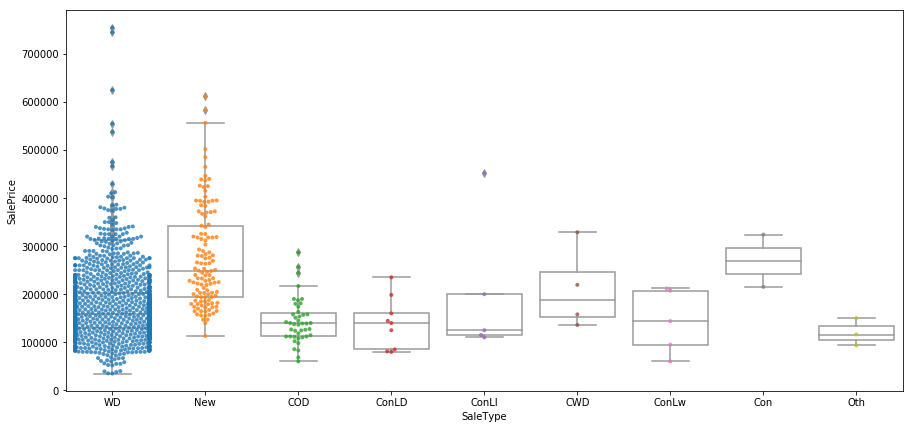

In [2634]:
plt.figure(figsize=(15,7))
grid = sns.swarmplot(x='SaleType', y='SalePrice', data=train, size=4, alpha=.8)
grid = sns.boxplot(x='SaleType', y='SalePrice', data=train, color='1')
plt.show()

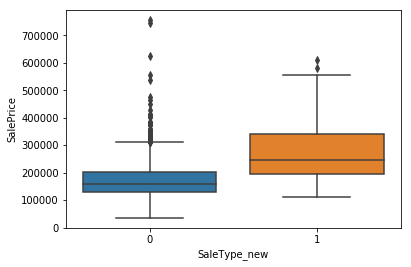

In [2635]:
for dataset in full_data:
    dataset['SaleType'] = dataset['SaleType'].fillna('WD')
    dataset['SaleType_new'] = dataset['SaleType'].replace('New', 1)
    dataset['SaleType_new'] = dataset['SaleType_new'].replace(['WD', 'COD', 'ConLD', 'ConLI', 
                                                                 'CWD', 'ConLw', 'Con', 'Oth', 'VWD'], 0)

grid = sns.boxplot(x='SaleType_new', y='SalePrice', data=train)
plt.show()

In [2636]:
corr = train.corr()
corr['SaleType_new'].sort_values(ascending=False).head(10)

SaleType_new       1.000000
SalePrice          0.357509
YearBuilt          0.346954
GarageYrBlt        0.340151
KitchenQual_ord    0.337878
logSalePrice       0.329190
OverallQual        0.327412
YearRemodAdd       0.325647
BsmtQual_ord       0.322988
GarageArea         0.296671
Name: SaleType_new, dtype: float64

In [2637]:
train_FeatCtrl['Utilities'] = 3
test_FeatCtrl['Utilities'] = 3
train_FeatCtrl['BsmtHalfBath'] = 3
test_FeatCtrl['BsmtHalfBath'] = 3
train_FeatCtrl['BsmtFullBath'] = 3
test_FeatCtrl['BsmtFullBath'] = 3
train_FeatCtrl['BsmtFullBath_new'] = 4
test_FeatCtrl['BsmtFullBath_new'] = 4
train_FeatCtrl['Functional'] = 3
test_FeatCtrl['Functional'] = 3
train_FeatCtrl['Functional_new'] = 4
test_FeatCtrl['Functional_new'] = 4
train_FeatCtrl['Exterior1st'] = 3
test_FeatCtrl['Exterior1st'] = 3
train_FeatCtrl['Exterior1st_new'] = 4
test_FeatCtrl['Exterior1st_new'] = 4
train_FeatCtrl['Exterior2nd'] = 3
test_FeatCtrl['Exterior2nd'] = 3
train_FeatCtrl['GarageCars'] = 2
test_FeatCtrl['GarageCars'] = 2
train_FeatCtrl['GarageArea'] = 2
test_FeatCtrl['GarageArea'] = 2
train_FeatCtrl['KitchenQual'] = 3
test_FeatCtrl['KitchenQual'] = 3
train_FeatCtrl['KitchenQual_ord'] = 4
test_FeatCtrl['KitchenQual_ord'] = 4
train_FeatCtrl['SaleType'] = 3
test_FeatCtrl['SaleType'] = 3
train_FeatCtrl['SaleType_new'] = 4
test_FeatCtrl['SaleType_new'] = 4

In [2638]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 103 entries, Id to SaleType_new
dtypes: float64(7), int64(51), object(45)
memory usage: 1.1+ MB


In [2639]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 101 entries, Id to SaleType_new
dtypes: float64(16), int64(40), object(45)
memory usage: 1.1+ MB


In [2640]:
train_dtypes = train.dtypes
test_dtypes = test.dtypes

In [2641]:
df_dtypes = pd.concat([train_dtypes, test_dtypes], axis=1, keys=['train', 'test'], join='outer', sort=True)
df_dtypes

,train,test
1stFlrSF,int64,int64
2ndFlrSF,int64,int64
3SsnPorch,int64,int64
Alley,object,object
AlleyBin,int64,int64
BedroomAbvGr,int64,int64
BldgType,object,object
BsmtCond,object,object
BsmtCond_ord,int64,int64
BsmtExposure,object,object


___________
## Feature Control DataFrame (so far)

In [2642]:
FeatCtrl = ['0 - not inspected',                      
            '1 - inspected and need discussion',                   
            '2 - inspected and ready',                        
            '3 - inspected and must drop before training',                  
            '4 - created and ready',                           
            '5 - inspected and consider log-transformation']                     

In [2643]:
train_FeatCtrl

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice,PoolAreA,AlleyBin,FenceBin,FireplaceQu_ord,FireplacesBin,logLotFrontage,logLotArea,LotAreaBin,GarageQual_ord,GarageCond_ord,GarageFinish_ord,GarageType_new,BsmtQual_ord,BsmtCond_ord,Exposure,Exposure_ord,BsmtFinSF,Electrical_new,BsmtFullBath_new,Functional_new,Exterior1st_new,KitchenQual_ord,SaleType_new
0,0,0,2,2,4,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2,2,0,0,0,3,3,0,2,3,3,3,2,2,0,0,0,3,0,0,0,0,3,3,0,0,0,0,3,0,3,3,3,3,2,3,2,2,3,3,0,0,0,0,0,0,0,3,3,3,3,0,0,3,0,0,0,3,1,4,4,4,4,4,3,4,3,4,4,4,3,3,4,4,4,4,4,4,4,4


In [2644]:
columns_to_inspect = list(train_FeatCtrl.loc[:, (train_FeatCtrl == 0).any(axis=0)].columns)
columns_to_drop = list(train_FeatCtrl.loc[:, (train_FeatCtrl == 3).any(axis=0)].columns)
columns_ready = list(train_FeatCtrl.loc[:, (train_FeatCtrl == 2).any(axis=0)].columns)
columns_created = list(train_FeatCtrl.loc[:, (train_FeatCtrl == 4).any(axis=0)].columns)
columns_revision = list(train_FeatCtrl.loc[:, (train_FeatCtrl == 1).any(axis=0)].columns)

print('COLUMNS TO INSPECT:')
print(columns_to_inspect)
print()
print('COLUMNS TO DROP:')
print(columns_to_drop)
print()
print('COLUMNS READY:')
print(columns_ready)
print()
print('COLUMNS_CREATED:')
print(columns_created)
print()
print('COLUMNS THAT NEED DISCUSSION:')
print(columns_revision)


COLUMNS TO INSPECT:
['Id', 'MSSubClass', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice', 'logSalePrice']

COLUMNS TO DROP:
['Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType',

In [ ]:
#